In [8]:
%matplotlib qt5

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from juanFunciones import *
from IPython.display import display
import re
from wordcloud import WordCloud, STOPWORDS # Wordcloud: pip install wordcloud
import plotly.plotly as py

In [6]:
sns.set()
pd.options.display.max_columns = None
py.plotly.tools.set_credentials_file(username='tbotalla', api_key='zfkG3X8bXKe7m5oXfswC')

In [7]:
types = {
 "event" : "category", 
 "person" : "category", 
 "url" : "category", 
 "sku" : "category", 
 "model" : "category", 
 "condition" : "category", 
 "storage" : "category", 
 "color" : "category", 
 "staticpage" : "category", 
 "campaign_source" : "category", 
 "search_engine" : "category", 
 "channel" : "category", 
 "new_vs_returning" : "category", 
 "city" : "category", 
 "region" : "category", 
 "country" : "category", 
 "device_type" : "category", 
 "screen_resolution" : "category", 
 "operating_system_version" : "category", 
 "browser_version" : "category",
    "os" : "category",
    "model_brand": "category",
}

df = pd.read_csv("fiuba-trocafone-tp1-final-set/events_features.csv", parse_dates=["timestamp"], dtype=types)

---
## Columnas distintas

In [8]:
df.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'os', 'model_brand'],
      dtype='object')

In [9]:
df.event.cat.categories

Index(['ad campaign hit', 'brand listing', 'checkout', 'conversion',
       'generic listing', 'lead', 'search engine hit', 'searched products',
       'staticpage', 'viewed product', 'visited site'],
      dtype='object')

---
## Columnas que sirven para cada evento

In [10]:
eventosUnicos = df.event.unique()

In [11]:
from juanFunciones import filteredDf

In [12]:
for col in eventosUnicos:
    print(col+": ", filteredDf(df, col).columns.drop(["timestamp", "event", "person"]).values)

ad campaign hit:  ['url' 'campaign_source']
visited site:  ['channel' 'new_vs_returning' 'city' 'region' 'country' 'device_type'
 'screen_resolution' 'operating_system_version' 'browser_version' 'os']
viewed product:  ['sku' 'model' 'condition' 'storage' 'color' 'model_brand']
checkout:  ['sku' 'model' 'condition' 'storage' 'color' 'model_brand']
generic listing:  ['skus']
search engine hit:  ['search_engine']
brand listing:  ['skus']
searched products:  ['skus' 'search_term']
conversion:  ['sku' 'model' 'condition' 'storage' 'color' 'model_brand']
staticpage:  ['staticpage']
lead:  ['model' 'model_brand']


In [13]:
df[df["event"] == "visited site"]["screen_resolution"].value_counts()

360x640      30009
1366x768     21379
320x534       3622
1920x1080     3521
320x570       2561
1360x768      2476
1600x900      2435
1024x768      2362
1440x900      2210
1280x1024     1914
320x568       1780
1280x720      1139
1280x800      1102
1536x864      1057
412x732        934
375x667        931
424x753        744
320x480        600
320x569        551
600x1024       432
1680x1050      373
1280x768       343
1024x600       317
768x1024       316
414x736        231
640x360        227
480x800        215
1093x615       208
360x740        203
320x427        163
             ...  
1080x2010        1
240x276          1
2160x1080        1
768x1366         1
976x549          1
1368x768         1
396x704          1
487x866          1
1080x2160        1
1263x789         1
1012x569         1
1958x1101        1
2021x1137        1
1007x569         1
820x480          1
320x240          1
391x695          1
364x647          1
2048x1152        1
1080x2220        1
351x623          1
1920x983    

In [14]:
from juanFunciones import generateSessions as genSes

In [15]:
sessions = genSes(df, "10 min")

/home/tbotalla/workspace/orga2018/juanFunciones.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [16]:
df["session_num"] = sessions

---
### mean events by session

In [17]:
duracion_promedio = df.groupby(["person", "session_num"]).agg({"session_num":"count"}).unstack("session_num").agg("mean").mean()

In [18]:
duracion_promedio

8.011345350646128

---

# ¿Pudieron descubrir features jerarquizando información de alguno de loscampos (por ejemplo “screen_resolution”)?

In [19]:
from juanFunciones import filteredDf, validColumns

In [20]:
validColumns(df)

{'ad campaign hit': array(['url', 'campaign_source', 'session_num'], dtype=object),
 'brand listing': array(['skus', 'session_num'], dtype=object),
 'checkout': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand',
        'session_num'], dtype=object),
 'conversion': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand',
        'session_num'], dtype=object),
 'generic listing': array(['skus', 'session_num'], dtype=object),
 'lead': array(['model', 'model_brand', 'session_num'], dtype=object),
 'search engine hit': array(['search_engine', 'session_num'], dtype=object),
 'searched products': array(['skus', 'search_term', 'session_num'], dtype=object),
 'staticpage': array(['staticpage', 'session_num'], dtype=object),
 'viewed product': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand',
        'session_num'], dtype=object),
 'visited site': array(['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'scr

In [21]:
dfFeatures = pd.DataFrame(index=df.index)

In [22]:
df1 = filteredDf(df, "visited site")

## Sistemas operativos mas usados segun dispositivo

In [23]:
for os in ["Tizen", "Windows", "iOS", "OS X", "Android", "Other"]:
    dfOS = df1.operating_system_version.str.contains(os)
    if dfOS.any():
        df1.loc[dfOS, "OS"] = os
dfFeatures["os"] = df1["OS"]

In [24]:
df1.head(2)

timestamp         event    person channel new_vs_returning  \
1 2018-05-31 23:38:05  visited site  0004b0a2    Paid              New   
5 2018-05-29 13:29:26  visited site  0006a21a    Paid              New   

             city          region country device_type screen_resolution  \
1      Camaragibe      Pernambuco  Brazil  Smartphone           360x640   
5  Rio de Janeiro  Rio de Janeiro  Brazil  Smartphone           360x640   

  operating_system_version   browser_version       os  session_num       OS  
1                Android 6  Chrome Mobile 39  Android            0  Android  
5            Android 5.1.1       Android 5.1  Android            0  Android

In [25]:
df1.loc[df1.OS == False, "OS"] = "Other"

In [26]:
df1.OS.value_counts()

Windows    41495
Android    41410
iOS         3539
OS X         406
Other         48
Tizen          7
Name: OS, dtype: int64

## Browsers mas usados segun dispositivo

In [27]:
df1 = filteredDf(df, "visited site")

In [28]:
df1.browser_version.value_counts()

Chrome 66.0                         22611
Chrome Mobile 66.0                  17513
Chrome 65.0                          6635
Chrome Mobile 65.0                   5665
Chrome Mobile 64.0                   3083
Chrome 67.0                          3073
Chrome Mobile 67.0                   2683
Chrome 64.0                          2450
Mobile Safari 11                     2071
Chrome Mobile 39                     1639
Chrome 63.0                          1490
Chrome Mobile 63.0                   1413
Samsung Internet 6.4                 1056
Firefox 60                           1049
Firefox 59                            918
Mobile Safari 10                      703
Edge 16.16299                         658
Chrome 49.0                           602
Chrome Mobile 62.0                    568
Chrome Mobile 55.0                    527
Chrome Mobile 43.0                    422
Chrome Mobile 61.0                    390
IE 11                                 385
Opera 53.0                        

In [29]:
df1["browser"] = False
for browser in ["Chrome","Safari", "Firefox", "Opera", "Samsung Internet", "Edge", "IE", "Facebook", "Android", "UC"]:
    dfBrowser = df1.browser_version.str.contains(browser)
    if dfBrowser.any():
        df1.loc[dfBrowser, "browser"] = browser
dfFeatures["browser"] = df1["browser"]

In [32]:
df1.loc[df1.browser == False, "browser"] = "Other"

In [33]:
df1.browser.value_counts()

Chrome              75137
Safari               3402
Firefox              2616
Samsung Internet     1699
Facebook             1415
Edge                 1145
Opera                 689
IE                    643
Android               347
Other                 149
UC                    136
Name: browser, dtype: int64

# ¿Pudieron descubrir features en el campo ‘model’? ¿Cuales fueron?

In [34]:
df.head(2)

timestamp            event    person                        url  \
0 2018-05-31 23:38:05  ad campaign hit  0004b0a2  /comprar/iphone/iphone-5s   
1 2018-05-31 23:38:05     visited site  0004b0a2                        NaN   

   sku model condition storage color skus search_term staticpage  \
0  NaN   NaN       NaN     NaN   NaN  NaN         NaN        NaN   
1  NaN   NaN       NaN     NaN   NaN  NaN         NaN        NaN   

  campaign_source search_engine channel new_vs_returning        city  \
0          criteo           NaN     NaN              NaN         NaN   
1             NaN           NaN    Paid              New  Camaragibe   

       region country device_type screen_resolution operating_system_version  \
0         NaN     NaN         NaN               NaN                      NaN   
1  Pernambuco  Brazil  Smartphone           360x640                Android 6   

    browser_version       os model_brand  session_num  
0               NaN      NaN         NaN            0  
1  Chrome Mobile 39  Android         NaN            0

In [35]:
valid = validColumns(df)

In [36]:
#df1 = filteredDf(df, "viewed product")
df1 = df.loc[df.model.notna()].dropna(axis=1, how="all")

In [37]:
df1.loc[:, "model_brand"] = False
for brand in ["Samsung", "iPhone", "Motorola", "Asus", "Lenovo", "Sony", "LG", "Quantum", "iPad", "Blackberry"]:
    dfStr = df1.model.str.contains(brand)
    if dfStr.any():
        df1.loc[dfStr, "model_brand"] = brand
dfFeatures["model_brand"] = df1["model_brand"]

In [38]:
df1.model_brand.value_counts()

iPhone        256585
Samsung       218127
Motorola       63518
LG              9724
Sony            7025
Lenovo          4779
Asus            2091
iPad            1914
Quantum          520
Blackberry         1
Name: model_brand, dtype: int64

## Features de fecha

In [39]:
dfFeatures["day_of_week"] = df.timestamp.dt.dayofweek

In [40]:
dfFeatures["month"] = df.timestamp.dt.month

In [41]:
dfFeatures["week"] = df.timestamp.dt.week

In [42]:
dfT = df.reset_index().set_index("timestamp")

In [43]:
dfT.columns

Index(['index', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'os', 'model_brand',
       'session_num'],
      dtype='object')

### Day or night between 8 and 18

In [44]:
dfDay = dfT.between_time("8:00", "18:00")

In [45]:
dfDay.loc[:,"day_vs_night"] = dfDay.event.map(lambda x: "DAY")

/home/tbotalla/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/tbotalla/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [46]:
dfDayIdx = dfDay.set_index("index")

In [47]:
dfFeatures["day_vs_night"] =  dfDayIdx.day_vs_night

In [48]:
dfFeatures["day_vs_night"] = dfFeatures.day_vs_night.fillna(value="NIGHT")

## Features de Color

In [49]:
dfFil = filteredDf(df, "checkout")

In [50]:
dfFil.columns

Index(['timestamp', 'event', 'person', 'sku', 'model', 'condition', 'storage',
       'color', 'model_brand', 'session_num'],
      dtype='object')

In [51]:
from juanFunciones import colorsByName

In [52]:
colorDic = colorsByName()

In [53]:
customColors = {}
for elem in dfFil.color.value_counts().index:
    if elem in colorDic:
        print(elem, "IN", colorDic[elem])
        customColors[elem] = colorDic[elem]
    else:
        subElem = elem.split()[0]
        if subElem in colorDic:
            print(subElem, "INOUT", colorDic[subElem])
            customColors[elem] = colorDic[subElem]
        else:
            print(elem, "OUT")
            customColors[elem] = "NOTACOLOR"

Preto IN #000000
Dourado IN #DAA520
Cinza INOUT #808080
Branco IN #FFFFFF
Prateado OUT
Ouro INOUT #FFD700
Prata IN #C0C0C0
Rosa IN #FFC0CB
Preto INOUT #000000
Platinum OUT
Cinza IN #808080
Azul IN #0000FF
Ametista IN #9966CC
Ouro IN #FFD700
Preto INOUT #000000
Vermelho IN #FF0000
Bambu OUT
Preto INOUT #000000
Titânio OUT
Verde IN #008000
Indigo OUT
Preto INOUT #000000
Black Piano OUT
Branco INOUT #FFFFFF
Cabernet OUT
Azul INOUT #0000FF
Branco INOUT #FFFFFF
Branco INOUT #FFFFFF
Azul INOUT #0000FF
Branco INOUT #FFFFFF
Amarelo IN #FFFF00
Preto INOUT #000000
Ônix OUT
Couro INOUT #F0DC82
Branco INOUT #FFFFFF
Rose OUT
Verde INOUT #008000
Olympic Edition OUT
Rouge OUT
Roxo IN #993399
Branco INOUT #FFFFFF
Silver OUT
Branco INOUT #FFFFFF
Preto INOUT #000000
Couro INOUT #F0DC82
Preto INOUT #000000
Azul INOUT #0000FF
Iuna OUT
Framboesa OUT
Branco INOUT #FFFFFF
Preto INOUT #000000
Cromo OUT
Preto INOUT #000000
Turquesa IN #40E0D0
Verde INOUT #008000
Branco INOUT #FFFFFF
Couro INOUT #F0DC82
Preto I

In [54]:
customColors["Prateado"] = "#C0C0C0"
customColors["Silver"] = "#C0C0C0"
customColors["Platinum"] = "#D3D3D3"
customColors["Titânio"] = "#D3D3D3"
customColors["Cromo"] = "#D3D3D3"
customColors["Bambu"] = "#008000"
customColors["Black Piano"] = "#000000"
customColors["Indigo"] = "#9400D3"
customColors["Cabernet"] = "#8B0000"
customColors["Rouge"] = "#8B0000"
customColors["Olympic Edition"] = "#8B0000"
customColors["Ônix"] = "#696969"
customColors["Rose"] = "#FFC0CB"
customColors["Framboesa"] = "#FFC0CB"
customColors["Iuna"] = "#FDF5E6"

In [55]:
dfFil["hex_color"] = dfFil.color.map(lambda x: customColors[x])

In [56]:
dfFeatures["hex_color"] = dfFil.hex_color

In [57]:
import matplotlib.pyplot as plt

In [58]:
%matplotlib inline

In [59]:
matCorr = pd.get_dummies(dfFil.loc[:,["condition", "storage", "model_brand"]]).corr(method="spearman") 
matCorr

condition_Bom  condition_Bom - Sem Touch ID  \
condition_Bom                      1.000000                     -0.166517   
condition_Bom - Sem Touch ID      -0.166517                      1.000000   
condition_Excelente               -0.555567                     -0.111401   
condition_Muito Bom               -0.515742                     -0.103415   
condition_Novo                    -0.017892                     -0.003588   
storage_128GB                     -0.054479                     -0.039459   
storage_16GB                       0.027042                      0.181082   
storage_256GB                     -0.069826                     -0.016413   
storage_32GB                      -0.023248                     -0.076731   
storage_4GB                        0.007139                     -0.017163   
storage_512MB                     -0.000803                     -0.007904   
storage_64GB                      -0.040361                     -0.055920   
storage_8GB                        0.097803                     -0.063529   
model_brand_Asus                  -0.027006                     -0.007904   
model_brand_LG                    -0.033480                     -0.023784   
model_brand_Lenovo                -0.022904                     -0.016474   
model_brand_Motorola              -0.011925                     -0.064504   
model_brand_Quantum               -0.004066                     -0.004338   
model_brand_Samsung                0.176348                     -0.159970   
model_brand_Sony                  -0.013303                     -0.014737   
model_brand_iPad                  -0.035694                     -0.008451   
model_brand_iPhone                -0.148725                      0.215188   
model_brand_Blackberry                  NaN                           NaN   

                              condition_Excelente  condition_Muito Bom  \
condition_Bom                           -0.555567            -0.515742   
condition_Bom - Sem Touch ID            -0.111401            -0.103415   
condition_Excelente                      1.000000            -0.345033   
condition_Muito Bom                     -0.345033             1.000000   
condition_Novo                          -0.011970            -0.011112   
storage_128GB                            0.039186             0.039169   
storage_16GB                            -0.075969            -0.026541   
storage_256GB                            0.072484             0.012805   
storage_32GB                             0.051790             0.005309   
storage_4GB                             -0.003535             0.002551   
storage_512MB                           -0.006288             0.010758   
storage_64GB                             0.041548             0.025250   
storage_8GB                             -0.054135            -0.030893   
model_brand_Asus                        -0.006288             0.041191   
model_brand_LG                           0.006106             0.042500   
model_brand_Lenovo                       0.016629             0.016249   
model_brand_Motorola                     0.004703             0.035949   
model_brand_Quantum                      0.005205             0.001139   
model_brand_Samsung                     -0.050312            -0.087560   
model_brand_Sony                         0.013259             0.007866   
model_brand_iPad                         0.038284             0.005294   
model_brand_iPhone                       0.037635             0.045821   
model_brand_Blackberry                        NaN                  NaN   

                              condition_Novo  storage_128GB  storage_16GB  \
condition_Bom                      -0.017892      -0.054479      0.027042   
condition_Bom - Sem Touch ID       -0.003588      -0.039459      0.181082   
condition_Excelente                -0.011970       0.039186     -0.075969   
condition_Muito Bom                -0.011112       0.039169     -0.026541   
condition_Novo     

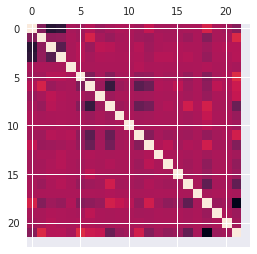

In [60]:
plt.matshow(matCorr)

## Features de 

In [61]:
dfFil = filteredDf(df, "ad campaign hit")

In [62]:
dfFil[dfFil.url.str.startswith("/comprar/iphone") == True]["url"].value_counts()

/comprar/iphone                                     4132
/comprar/iphone/6s                                  3393
/comprar/iphone/6                                   3228
/comprar/iphone/iphone-5s                           2689
/comprar/iphone/7                                   1120
/comprar/iphone/iphone-6s-plus                       947
/comprar/iphone/iphone-se                            795
/comprar/iphone/iphone-5c                            722
/comprar/iphone/iphone-5                             716
/comprar/iphone/7-plus                               675
/comprar/iphone/                                     520
/comprar/iphone/6-plus                               426
/comprar/iphone/iphone-4s                            352
/comprar/iphone/iphone-4g                            271
/comprar/iphone/iphone-5s/                            92
/comprar/iphone/iphone-8-plus                         13
/comprar/iphone/iphone-8                              11
/comprar/iphone/iphone-x       

# Write to csv

In [63]:
dfFeatures.head()

os browser model_brand  day_of_week  month  week day_vs_night  \
0      NaN     NaN         NaN            3      5    22        NIGHT   
1  Android  Chrome         NaN            3      5    22        NIGHT   
2      NaN     NaN      iPhone            3      5    22        NIGHT   
3      NaN     NaN      iPhone            3      5    22        NIGHT   
4      NaN     NaN     Samsung            1      5    22          DAY   

  hex_color  
0       NaN  
1       NaN  
2       NaN  
3   #808080  
4       NaN

In [64]:
#dfFeatures.to_csv("events_features.csv", index=False)

In [65]:
dfFeat = pd.read_csv("events_features.csv")

---
## Las conversiones de que celular se hicieron?

#### Hacer un fillna forward para valores de device_type etc, por usuario, para relacionar

In [66]:
dfFil = filteredDf(df, "conversion")

In [67]:
dfFil.head()

timestamp       event    person     sku  \
220  2018-03-20 17:46:12  conversion  00204059  3084.0   
2282 2018-04-26 22:28:53  conversion  00c13dee  6650.0   
2547 2018-06-10 14:37:50  conversion  00fdbb4b  3348.0   
4245 2018-03-16 13:50:25  conversion  0146a9df  2694.0   
6985 2018-02-09 22:07:07  conversion  01db2fe6  6357.0   

                                 model  condition storage           color  \
220                   Motorola Moto X2  Muito Bom    32GB   Couro Vintage   
2282  Samsung Galaxy Core Plus Duos TV  Muito Bom     4GB          Branco   
2547            Samsung Galaxy S6 Flat  Muito Bom    32GB          Branco   
4245                         iPhone 5s        Bom    32GB  Cinza espacial   
6985                 Samsung Galaxy J5        Bom    16GB           Preto   

     model_brand  session_num  
220     Motorola           17  
2282     Samsung            2  
2547     Samsung            0  
4245      iPhone            1  
6985     Samsung            3

In [68]:
df.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'os', 'model_brand',
       'session_num'],
      dtype='object')

In [69]:
dfByPer = df.set_index(["person"])

In [70]:
countsByOS = dfByPer.iloc[0:3000].groupby("person").agg({"os":"value_counts"})

/home/tbotalla/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/category.py:148: RuntimeWarning:

Values and categories have different dtypes. Did you mean to use
'Categorical.from_codes(codes, categories)'?

/home/tbotalla/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/category.py:148: RuntimeWarning:

None of the categories were found in values. Did you mean to use
'Categorical.from_codes(codes, categories)'?



---
## Informacion de sesiones para cada persona

#### considero que los campos se mantienen hasta que cambian en el proximo visited_site, y venian igual al primero si no estan especificados

In [71]:
def getSessionByPerson(sessionStats, person, ses):
    person = sessionStats.loc[person]
    if ses not in person.index:
        try:
            ses =  person[(person.index < ses)].index[-1]
        except IndexError:
            ses = person.index[0]
    return person.loc[ses]

In [72]:
getSessionByPerson(sessionStats,"0004b0a2",0)

NameError: name 'sessionStats' is not defined

In [73]:
dfSess = pd.read_csv("session_stats.csv").set_index(["person", "session_number"])

In [74]:
dfIdx = df.set_index(["person", "session_num"])

In [75]:
dfSorted = dfIdx.sort_values(by="timestamp").groupby(["person", "session_num"])

In [76]:
vsChk = dfIdx[(dfIdx["event"]=="visited site") | (dfIdx["event"] == "checkout")]

In [77]:
idx = filteredDf(df, "visited site").set_index(["person", "session_num"])

In [78]:
nwIdx = idx.drop(columns =["timestamp", "event"])

In [79]:
validColumns(df)

{'ad campaign hit': array(['url', 'campaign_source', 'session_num'], dtype=object),
 'brand listing': array(['skus', 'session_num'], dtype=object),
 'checkout': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand',
        'session_num'], dtype=object),
 'conversion': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand',
        'session_num'], dtype=object),
 'generic listing': array(['skus', 'session_num'], dtype=object),
 'lead': array(['model', 'model_brand', 'session_num'], dtype=object),
 'search engine hit': array(['search_engine', 'session_num'], dtype=object),
 'searched products': array(['skus', 'search_term', 'session_num'], dtype=object),
 'staticpage': array(['staticpage', 'session_num'], dtype=object),
 'viewed product': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand',
        'session_num'], dtype=object),
 'visited site': array(['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'scr

In [80]:
dfIdx[["event","timestamp",'sku', 'model', 'condition', 'storage', 'color', 'model_brand']].join(nwIdx)

event           timestamp      sku  \
person   session_num                                                   
0004b0a2 0              ad campaign hit 2018-05-31 23:38:05      NaN   
         0                 visited site 2018-05-31 23:38:05      NaN   
         0               viewed product 2018-05-31 23:38:09   2694.0   
         0                     checkout 2018-05-31 23:38:40   2694.0   
0006a21a 0               viewed product 2018-05-29 13:29:25  15338.0   
         0                 visited site 2018-05-29 13:29:26      NaN   
         0              ad campaign hit 2018-05-29 13:29:27      NaN   
         0                     checkout 2018-05-29 13:29:35  15338.0   
000a54b2 0              generic listing 2018-04-09 20:12:31      NaN   
         0                 visited site 2018-04-09 20:12:31      NaN   
         0            search engine hit 2018-04-09 20:12:31      NaN   
         0              ad campaign hit 2018-04-09 20:12:31      NaN   
         0                brand listing 2018-04-09 20:12:53      NaN   
         0               viewed product 2018-04-09 20:13:14  12661.0   
         1                brand listing 2018-04-09 20:13:20      NaN   
         1              ad campaign hit 2018-05-24 11:21:07      NaN   
         1                 visited site 2018-05-24 11:21:07      NaN   
         1            search engine hit 2018-05-24 11:21:07      NaN   
         1              generic listing 2018-05-24 11:21:08      NaN   
         1              generic listing 2018-05-24 11:26:34      NaN   
         1                brand listing 2018-05-24 11:26:53      NaN   
         1              generic listing 2018-05-24 11:26:56      NaN   
         1               viewed product 2018-05-24 11:27:47  10254.0   
         1              generic listing 2018-05-24 11:27:50      NaN   
         1                brand listing 2018-05-24 11:28:10      NaN   
         1                brand listing 2018-05-24 11:28:36      NaN   
         1               viewed product 2018-05-24 11:28:59   6581.0   
         1               viewed product 2018-05-24 11:29:06   6579.0   
         1               viewed product 2018-05-24 11:29:14   6580.0   
         1               viewed product 2018-05-24 11:29:16   6581.0   
...                                 ...                 ...      ...   
ffffa8d1 1                 visited site 2018-06-09 13:40:05      NaN   
         1            search engine hit 2018-06-09 13:40:05      NaN   
         1              generic listing 2018-06-09 13:40:05      NaN   
         1            searched products 2018-06-09 13:42:05      NaN   
         1               viewed product 2018-06-09 13:43:43   8513.0   
         2               viewed product 2018-06-09 13:43:52   8512.0   
         2               viewed product 2018-06-09 15:33:23   8511.0   
         2               viewed product 2018-06-09 15:33:30   8512.0   
         2               viewed product 2018-06-09 15:34:46   8526.0   
         2               viewed product 2018-06-09 15:35:00   9231.0   
         2               viewed product 2018-06-09 15:35:11   9230.0   
         2               viewed product 2018-06-09 15:35:13   9231.0   
         2               viewed product 2018-06-09 15:35:18   8512.0   
         2               viewed product 2018-06-09 15:39:05   8513.0   
         2               viewed product 2018-06-09 15:39:07   8512.0   
         2                 visited site 2018-06-09 15:39:56      NaN   
         2              generic listing 2018-06-09 15:41:29      NaN   
         3               viewed product 2018-06-09 15:43:29  12800.0   
         3            search engine hit 2018-06-11 12:25:40      NaN   
         3                 visited site 2018-06-11 12:25:40      NaN   
         3              ad campaign hit 2018-06-11 12:25:40      NaN   
         3              generic listing 2018-06-11 12:25:41      NaN   
         3            searched products 2018-06-11 12:28:47      NaN   
  

In [81]:
dfVisited = df.drop(columns=['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'screen_resolution', 'operating_system_version',
        'browser_version', 'os',]).set_index(["person", "session_num"]).join(nwIdx)

In [82]:
dfIdx = dfIdx.index.drop_duplicates()

In [83]:
dfC = pd.DataFrame(index=dfIdx).join(nwIdx.drop(columns=["channel", "new_vs_returning"]))

In [84]:
idxC = dfC.index.drop_duplicates()

In [85]:
dfIdx[dfSess.columns] = dfSess

TypeError: Index does not support mutable operations

In [ ]:
dfIdx[dfIdx["event"] == "conversion"].device_type.value_counts()

In [ ]:
dfEvCh = dfIdx[(dfIdx["event"]=="visited site") | (dfIdx["event"] == "checkout")]

## Dataframe ordenado por persona y numero de sesion, con visited site arriba si existe, para siempre tener la informacion de visited site para cada sesion.

In [86]:
dfFeat = pd.read_csv("events_features.csv").drop(columns=["os", "model_brand"])

In [87]:
df = df.join(dfFeat)

In [88]:
dfPer = df.set_index("person")

In [89]:
visSitPer = df[df.event == "visited site"].person.drop_duplicates()

In [90]:
convPer = df[df.event == "conversion"].person.drop_duplicates()

In [91]:
idx = visSitPer.append(convPer).drop_duplicates().values

In [92]:
combined = visSitPer.append(convPer)

In [93]:
idx = combined[combined.duplicated()].values

In [94]:
dfEvConv = dfPer.loc[idx]

In [95]:
dfEvConv = dfEvConv[(dfEvConv.event=="visited site") | (dfEvConv.event=="conversion")].reset_index().drop_duplicates(["person", "device_type", "screen_resolution"]).set_index(["person", "session_num"])

In [96]:
validColumns(df)

{'ad campaign hit': array(['url', 'campaign_source', 'session_num', 'day_of_week', 'month',
        'week', 'day_vs_night'], dtype=object),
 'brand listing': array(['skus', 'session_num', 'day_of_week', 'month', 'week',
        'day_vs_night'], dtype=object),
 'checkout': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand',
        'session_num', 'day_of_week', 'month', 'week', 'day_vs_night',
        'hex_color'], dtype=object),
 'conversion': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand',
        'session_num', 'day_of_week', 'month', 'week', 'day_vs_night'], dtype=object),
 'generic listing': array(['skus', 'session_num', 'day_of_week', 'month', 'week',
        'day_vs_night'], dtype=object),
 'lead': array(['model', 'model_brand', 'session_num', 'day_of_week', 'month',
        'week', 'day_vs_night'], dtype=object),
 'search engine hit': array(['search_engine', 'session_num', 'day_of_week', 'month', 'week',
        'day_vs_night'], dtype=ob

In [97]:
dfEvConv = dfEvConv.sort_values(by=["person","timestamp"])

KeyError: 'person'

In [ ]:
filled = dfEvConv[['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'screen_resolution', 'operating_system_version',
        'browser_version', 'os', 'day_of_week', 'month',
        'week', 'day_vs_night', 'browser']].groupby(["person"]).fillna(method="ffill")

In [ ]:
filled = filled.groupby("person").fillna(method="bfill")

In [ ]:
dfEvConv[['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'screen_resolution', 'operating_system_version',
        'browser_version', 'os', 'day_of_week', 'month',
        'week', 'day_vs_night', 'browser']] = filled 

In [ ]:
conversionStats = filteredDf(dfEvConv, "conversion")

In [ ]:
#conversionStats.to_csv("conversion_stats.csv")

In [ ]:
conversionStats.device_type.value_counts()

In [ ]:
def hasSite(ser):
    return ser.str.contains("visited site")

In [104]:
conversions2 = df.groupby("person").filter(lambda x:("visited site" and "conversion") in x.event.values)

----
## Analisis Conversiones

In [105]:
dfc = pd.read_csv("conversion_stats.csv")

In [106]:
dfc.timestamp = pd.to_datetime(dfc.timestamp)

In [107]:
dfc.columns

Index(['person', 'session_num', 'timestamp', 'event', 'sku', 'model',
       'condition', 'storage', 'color', 'channel', 'new_vs_returning', 'city',
       'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'os', 'model_brand',
       'day_of_week', 'month', 'week', 'day_vs_night', 'browser'],
      dtype='object')

In [108]:
sns.catplot(x="week", y="event", hue="day_vs_night", data=dfc)

AttributeError: module 'seaborn' has no attribute 'catplot'

In [109]:
dfdn = dfc.groupby("month").agg({"day_vs_night":"count"})

In [110]:
dfdn

day_vs_night
month              
1                46
2                45
3               158
4               170
5               176
6                36

In [114]:
dfdn.ungrou

AttributeError: 'DataFrame' object has no attribute 'ungrou'

In [115]:
sns.catplot(x="model_brand", y="os", hue="day_vs_night",
            kind="violin", split=True, data=dfc);


AttributeError: module 'seaborn' has no attribute 'catplot'

In [116]:
dfc.model_brand.value_counts()

Samsung     329
iPhone      184
Motorola     88
LG           14
Lenovo        8
Sony          6
Asus          2
Name: model_brand, dtype: int64

In [117]:
dfc[dfc.model_brand=="iPhone"].os.value_counts()

Windows    103
Android     72
iOS          9
Name: os, dtype: int64

In [118]:
dfc[dfc.model_brand=="Samsung"].os.value_counts()

Windows    198
Android    116
iOS         10
OS X         2
Other        1
Name: os, dtype: int64

In [119]:
dfModelOs = dfc.groupby("country").agg({"os":"value_counts"}).unstack()

In [120]:
dfModelOs.columns = dfModelOs.columns.droplevel()

In [121]:
dfModelOs

os              Android  OS X  Other  Windows   iOS
country                                            
Brazil            222.0   2.0    1.0    361.0  24.0
United Kingdom      NaN   NaN    NaN      1.0   NaN
Unknown             3.0   NaN    NaN     15.0   NaN

In [122]:
dfModelOs = dfc.groupby("model_brand").agg({"day_vs_night":"value_counts"}).unstack()

In [123]:
dfModelOs.columns = dfModelOs.columns.droplevel()

In [124]:
dfModelOs

day_vs_night    DAY  NIGHT
model_brand               
Asus            1.0    1.0
LG              3.0   11.0
Lenovo          NaN    8.0
Motorola       32.0   56.0
Samsung       141.0  188.0
Sony            3.0    3.0
iPhone         76.0  108.0

In [125]:
dfc[dfc.os == "iOS"].model_brand.value_counts()

Samsung     10
iPhone       9
Motorola     5
Name: model_brand, dtype: int64

In [126]:
dfDummies = pd.get_dummies(dfc, columns=["os", "model_brand"])

In [127]:
dfDummies.columns

Index(['person', 'session_num', 'timestamp', 'event', 'sku', 'model',
       'condition', 'storage', 'color', 'channel', 'new_vs_returning', 'city',
       'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'day_of_week', 'month',
       'week', 'day_vs_night', 'browser', 'os_Android', 'os_OS X', 'os_Other',
       'os_Windows', 'os_iOS', 'model_brand_Asus', 'model_brand_LG',
       'model_brand_Lenovo', 'model_brand_Motorola', 'model_brand_Samsung',
       'model_brand_Sony', 'model_brand_iPhone'],
      dtype='object')

In [128]:
sns.pointplot(x="model_brand", y="month", hue="os_Andriod" ,data=dfDummies)

ValueError: Could not interpret input 'model_brand'

In [129]:
sns.catplot(y="timestamp", x="model_brand", hue="os", kind="swarm", data=dfc)

AttributeError: module 'seaborn' has no attribute 'catplot'

In [130]:
dfc.columns

Index(['person', 'session_num', 'timestamp', 'event', 'sku', 'model',
       'condition', 'storage', 'color', 'channel', 'new_vs_returning', 'city',
       'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'os', 'model_brand',
       'day_of_week', 'month', 'week', 'day_vs_night', 'browser'],
      dtype='object')

In [131]:
sns.catplot(y="timestamp", x="condition", hue="model_brand", kind="strip", data=dfc)

AttributeError: module 'seaborn' has no attribute 'catplot'

In [132]:
sns.catplot( y="month", x="model_brand" , hue="day_vs_night", kind="violin", split=True, data=dfc)

AttributeError: module 'seaborn' has no attribute 'catplot'

In [133]:
data = dfc[["model_brand", "os", "day_vs_night"]]

In [134]:
data = data.astype("category")

NotImplementedError: > 1 ndim Categorical are not supported at this time

In [135]:
sns.pairplot(data, hue="os")

IndexError: index -1 is out of bounds for axis 0 with size 0

<Figure size 0x0 with 0 Axes>

In [136]:
sns.catplot(y="timestamp", x="day_vs_night", hue="os", kind="swarm"
            , data=dfc);

AttributeError: module 'seaborn' has no attribute 'catplot'

---
# seguimientos Eventos

In [137]:
df.event.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [138]:
ev = pd.read_csv("eventos.csv").set_index("Unnamed: 0")

In [139]:
ev

ad campaign hit  visited site  viewed product  checkout  \
Unnamed: 0                                                                   
ad campaign hit             3390.0       17118.0         28893.0    1120.0   
visited site               19571.0        3516.0         25821.0    1927.0   
viewed product             25811.0       25144.0        367594.0   28415.0   
checkout                     791.0        1185.0          1900.0     754.0   
generic listing             7540.0       10227.0         23176.0     203.0   
search engine hit          13693.0       10058.0          8369.0     312.0   
brand listing               4728.0        4967.0         44313.0     123.0   
searched products           1300.0        2512.0         26093.0      52.0   
conversion                    87.0         323.0            69.0     226.0   
staticpage                   259.0         605.0           810.0      36.0   
lead                          59.0         204.0            27.0       3.0   
NaN                            0.0           0.0             0.0       0.0   

                   generic listing  search engine hit  brand listing  \
Unnamed: 0                                                             
ad campaign hit            12760.0            12048.0         6266.0   
visited site               16346.0            11152.0         5772.0   
viewed product             13770.0            10797.0        35598.0   
checkout                     617.0              262.0           99.0   
generic listing             4635.0             7124.0         7772.0   
search engine hit          12383.0              955.0         3990.0   
brand listing               2497.0             2657.0        37151.0   
searched products           1213.0             1003.0         1251.0   
conversion                   282.0               40.0           20.0   
staticpage                   418.0              230.0          217.0   
lead                          38.0               41.0           14.0   
NaN                            0.0                0.0            0.0   

                   searched products  conversion  staticpage   lead  \
Unnamed: 0                                                            
ad campaign hit               1094.0        14.0        94.0   14.0   
visited site                  2511.0        82.0       496.0   15.0   
viewed product               20593.0        66.0       980.0  145.0   
checkout                        49.0       619.0        33.0   16.0   
generic listing               6101.0        68.0       654.0   33.0   
search engine hit              983.0         4.0       193.0    7.0   
brand listing                 1987.0        15.0       158.0   39.0   
searched products            22550.0         7.0        79.0   13.0   
conversion                      14.0       104.0         6.0    1.0   
staticpage                     137.0         6.0       877.0    3.0   
lead                             7.0         2.0         1.0   52.0   
NaN                              0.0         0.0         0.0    0.0   

                   Unnamed: 12  
Unnamed: 0                      
ad campaign hit           16.0  
visited site             169.0  
viewed product            18.0  
checkout               27410.0  
generic listing            1.0  
search engine hit         10.0  
brand listing              0.0  
searched products          0.0  
conversion                 0.0  
staticpage                 0.0  
lead                       0.0  
NaN                        0.0

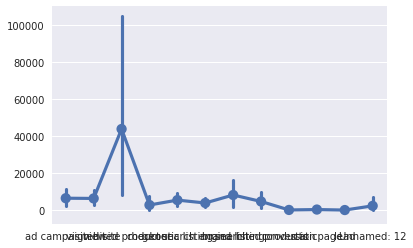

In [140]:
sns.pointplot(data=ev)

# Analisis búsquedas de los usuarios

In [160]:
events = pd.read_csv("fiuba-trocafone-tp1-final-set/events_features.csv", parse_dates=["timestamp"], dtype=types)

**Evento searched products, busqueda dentro del sitio**

In [161]:
searched_products_events = events[events["event"] == "searched products"].dropna(axis=1, how='all')
searched_products_events.notnull().any()

timestamp      True
event          True
person         True
skus           True
search_term    True
dtype: bool

In [162]:
len(searched_products_events[searched_products_events['search_term'] == ""])

0

In [163]:
searched_products_events.dropna(subset=['search_term'], inplace=True)
searched_products_events['search_term'].value_counts().head(1)

Iphone    1207
Name: search_term, dtype: int64

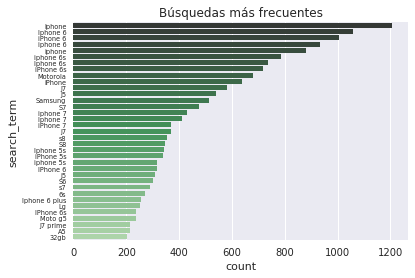

In [164]:
sns_plot = sns.countplot(y="search_term", data=searched_products_events, palette="Greens_d",
              order=searched_products_events.search_term.value_counts().iloc[:35].index)
sns_plot.set_title("Búsquedas más frecuentes")
sns_plot.set_yticklabels(sns_plot.get_yticklabels(), fontsize=6.5)
fig = sns_plot.get_figure()
fig.savefig("img/busquedas-frecuentes.png", bbox_inches = 'tight', label='small')
sns_plot

In [165]:
global_words = []
stopwords = ['nan']

def process_words(row, col):  
    words = row[col].split()
    valid_words = []
    for word in words:
        for w in stopwords:
            if (word.lower() == w):
                word = word.lower().replace(w, '')
        if (word != ''):
            valid_words.append(word)
        
    global_words.extend(valid_words) 
    return row

In [166]:
searched_products_events['search_term'] = searched_products_events['search_term'].astype(str)
searched_products_events = searched_products_events.apply(lambda row: process_words(row, 'search_term'), axis=1)

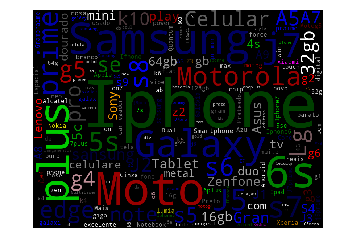

In [167]:
from wordcloud import (WordCloud, get_single_color_func)
text = ''
for word in global_words:
    text += ' ' + word
wordcloud = WordCloud(relative_scaling = 0.4,
                      stopwords = stopwords, width=800, height=600,
                      background_color="black", collocations=False
                      ).generate(text)
# Coloreo por marca
class GroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

color_to_words = {
    # Apple
    'green': ['Iphone', 'Iphone Iphone', 'Iphone S7', '5c iphone', 'iphone 6plus', 'iphone', 
                'iPhone', '4s Iphone', 'iPhone 7s', 'plus', '5s', '6s', 'se', '5c', 'iPad', 
                '6s iphone', 'rosa Iphone', '6s 64gb', 's7 iphone', 'Iphone 4s', 'gb iphone',
                'g5 iphone', 'plus 6s', 'usado iphone', 'Apple', 'Ifhone', 'IPhone4', 'Iphone5',
                'Iphone6', '4s', 'Ifone', 'Ipad', '7plus', '6plus', 'Iphone7', 'IPhone4', '7s',
                'Aifonl', 'Iponhe', '5se'],
    # Motorola
    'red': ['Moto', 'Motorola', 'Lenovo', 'g5', 'x2', 'g5s', 'play moto', 'Moto plus', 'e4',
                'moto e4', 'Motog5', 'play', 'motog', 'g3', 'x2', 'z2', 'g6', 'motog4', 'g2'],
    # Asus
    'black': ['Zenfone', 'zen', 'assus', 'Asus'],
    # Xiaomi
    'purple': ['xiaomi', 'Redmi'],
    # Nokia
    'yellow': ['Nokia', 'lumia'],
    # Sony
    'orange': ['Z3', 'Xperia', 'Sony', 'z5'],
    # Samsung
    'blue': ['Samsung', 'samsung', 'note galaxy', 'note', 'galaxy', 'A8', 'j7', 'j2', 'prime', 
                'prime j2', 's8', 'J2', 'J2 prime', 'S5', 's7', 's7 edge', 'gran prime', 'A9',
                'J7pro', 'Galaxia', 's5', 'j6', 's7edge', 'j5pro', 'A3', 'Core', 'A7', 'Samsumg',
                'galaxy', 'saumsung', 'sansumg', 'grand', 'E7', 'galax', 'praime', 'primer', 
                'j5prime', 'galáxy', 'galaxi', 'J1', 'A5', 'J3', 'J7prime', 'S4', 'J5', 'Galaxy',
                'sansung', 's2', 'Galáxia', 'Grampraime', 's3', 'edg', 's9', 'Gran', 'edge', 's6',
                'pramy'],
    #LG
    'pink': ['k10', 'g4', 'k5', 'q6', 'k4', 'Lg']
}

default_color = 'grey'
grouped_color_func = GroupedColorFunc(color_to_words, default_color)
wordcloud.recolor(color_func=grouped_color_func)
wordcloud.to_file('img/wc_insite_searches_1.png')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Analisis procedencia de las consultas a Trocafone

In [168]:
print('Cantidad de registros', len(events))
print('Cantidad de registros con dato de ciudad', len(events['city'].dropna()))
unknowns = events[events['city'] == 'Unknown']
print('Cantidad de registros con ciudad Unknown', len(unknowns))
print('Cantidad de registros para el evento visited site', len(events[events['event'] == 'visited site']))
print('Porcentaje sobre el total de registros con dato de ciudad', 100 * (len(events['city'].dropna()) - len(unknowns)) / len(events), '%')
print('Porcentaje sobre los visited site de registros con dato de ciudad', 100 * (len(events['city'].dropna()) - len(unknowns)) / len(events[events['event'] == 'visited site']), '%')
# Todos los registros con ciudad origen provienen del evento visited site
events.dropna(subset=['city'])['event'].value_counts()

Cantidad de registros 1011288
Cantidad de registros con dato de ciudad 87378
Cantidad de registros con ciudad Unknown 15819
Cantidad de registros para el evento visited site 87378
Porcentaje sobre el total de registros con dato de ciudad 7.07602582053777 %
Porcentaje sobre los visited site de registros con dato de ciudad 81.89590056993751 %


visited site         87378
viewed product           0
staticpage               0
searched products        0
search engine hit        0
lead                     0
generic listing          0
conversion               0
checkout                 0
brand listing            0
ad campaign hit          0
Name: event, dtype: int64

**Coordenadas de las ciudades**

In [169]:
cities = events['city'].value_counts()
cities_df = cities.to_frame()
cities_df['lat'] = 0.0
cities_df['lon'] = 0.0
cities_df.drop(cities_df.index[[0, 0]], inplace=True) # unknown
cities_df.reset_index(inplace=True)
cities_df.rename(columns={"index": "city", "city": "count"}, inplace=True)

In [170]:
print(cities_df['count'].sum())
cities_df['total'] = cities_df['count'].sum()
cities_df['porcentaje'] = 100 * cities_df['count'] / cities_df['total']
cities_df.head(10)

71559


city  count  lat  lon  total  porcentaje
0       São Paulo  11711  0.0  0.0  71559   16.365517
1  Rio de Janeiro   3538  0.0  0.0  71559    4.944172
2  Belo Horizonte   2568  0.0  0.0  71559    3.588647
3        Salvador   2314  0.0  0.0  71559    3.233695
4        Brasília   1530  0.0  0.0  71559    2.138096
5          Osasco   1148  0.0  0.0  71559    1.604271
6        Curitiba   1132  0.0  0.0  71559    1.581911
7       Fortaleza   1084  0.0  0.0  71559    1.514834
8          Recife    913  0.0  0.0  71559    1.275870
9         Goiânia    853  0.0  0.0  71559    1.192023

## NO EJECUTAR. YA EXPORTADO A cities_with_coord.csv

In [171]:
'''
%%time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
geolocator = Nominatim()
import time

def solve_coordinates(row):
    try:
        cities_tmp = pd.read_csv("cities_with_coord.csv")
        row_tmp = cities_tmp.loc[cities_tmp[cities_tmp['city'] == row['city']].index[0]]
        if row_tmp.lon == 0.0:
            loc = geolocator.geocode(row['city'])
            if loc is not None:
                row.lat = loc.latitude
                row.lon = loc.longitude
                cities_tmp.iloc[cities_tmp[cities_tmp['city'] == row['city']].index[0]] = row
                cities_tmp.to_csv('cities_with_coord.csv', sep=',', encoding='utf-8', index=False)
                time.sleep(10) # Para que la API no nos lockee
    except GeocoderTimedOut:
        return solve_coordinates(row)
    return row

cities_df = cities_df.apply(solve_coordinates, axis=1)
'''

'\n%%time\nfrom geopy.geocoders import Nominatim\nfrom geopy.exc import GeocoderTimedOut\ngeolocator = Nominatim()\nimport time\n\ndef solve_coordinates(row):\n    try:\n        cities_tmp = pd.read_csv("cities_with_coord.csv")\n        row_tmp = cities_tmp.loc[cities_tmp[cities_tmp[\'city\'] == row[\'city\']].index[0]]\n        if row_tmp.lon == 0.0:\n            loc = geolocator.geocode(row[\'city\'])\n            if loc is not None:\n                row.lat = loc.latitude\n                row.lon = loc.longitude\n                cities_tmp.iloc[cities_tmp[cities_tmp[\'city\'] == row[\'city\']].index[0]] = row\n                cities_tmp.to_csv(\'cities_with_coord.csv\', sep=\',\', encoding=\'utf-8\', index=False)\n                time.sleep(10) # Para que la API no nos lockee\n    except GeocoderTimedOut:\n        return solve_coordinates(row)\n    return row\n\ncities_df = cities_df.apply(solve_coordinates, axis=1)\n'

In [172]:
df = pd.read_csv("cities_with_coord.csv")
df['porcentaje'] = cities_df['porcentaje']

**Visualizaciones**

** Version 1: con plotly**

In [173]:
df['porcentaje'] = df['porcentaje'].apply(lambda x: "%0.2f" % x)
df['text'] = df['city'] + '<br>Consultas ' + (df['porcentaje']).astype(str) + '%'
# Gradiente de colores
colors = ["#E50200", "#E41100", "#E42000", "#E42F00", "#E43F00", "#E34E01", 
          "#E35D01", "#E36D01", "#E37C01", "#E38B01", "#E29A02", "#E2AA02", 
          "#E2B902", "#E2C802", "#E2D803"]
cities = []
scale = 100
number_cities = 800

for i in range(number_cities):
    if i >= len(colors):
        color = colors[len(colors) - 1]
    else:
        color = colors[i]
    city = dict(
        type = 'scattergeo',
        lon = [df.iloc[i]['lon']],
        lat = [df.iloc[i]['lat']],
        text = df.iloc[i]['text'],
        showlegend = False,    
        name = '',
        marker = dict(
                size = df.iloc[i]['count'] / scale,
                color = color,
                line = dict(width=0.5, color='rgb(40, 40, 40)'),
                sizemode = 'area',
                opacity = 0.7
        )
    )
    
    cities.append(city)

layout = dict(
        title = 'Origen consultas a Trocafone',
        showlegend = True,
        geo = dict(
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            countrycolor="rgb(30, 24, 24)",
            showocean = True,
            showcountries = True,
            showrivers = True,
            showcoastlines = True,
            showlakes = True,
            showsubunits = True
        )
    )

fig = dict(data=cities, layout=layout)
url = py.iplot(fig, validate=True, filename='bubble-map-consultas-trocafone')
print(url.resource)
url

https://plot.ly/~tbotalla/5


**Version 2: con basemap**

In [174]:
df = pd.read_csv("cities_with_coord.csv")
df = df.head(600) # 
lat = df['lat'].values
lon = df['lon'].values
count = df['count'].values

/home/tbotalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/home/tbotalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.

/home/tbotalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/home/tbotalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.

No handles with labels found to put in legend.


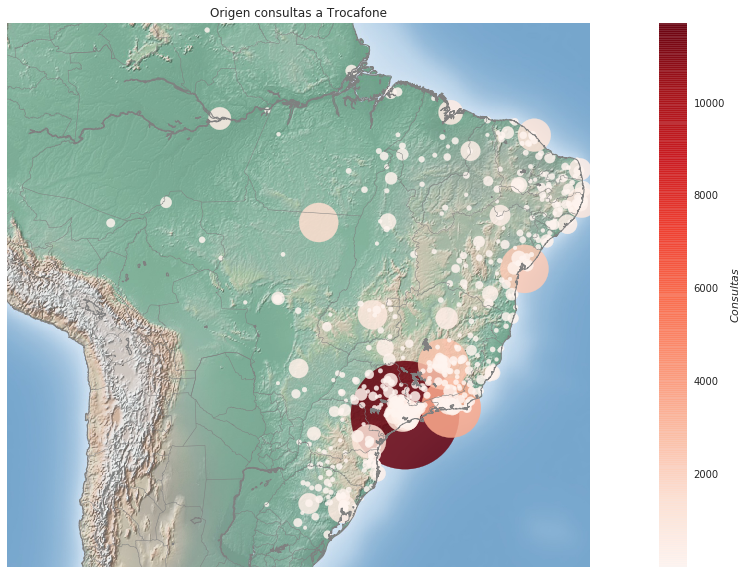

In [175]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(25, 10))
plt.title('Origen consultas a Trocafone')
m = Basemap(projection='lcc', resolution='h', 
            lat_0=-15.37, lon_0=-54.63,
            width=4.5E6, height=4.2E6)

m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
scale = 2.5
m.scatter(lon, lat, latlon=True, c=count, cmap='Reds', alpha=0.85, s=count)
plt.colorbar(label=r'$Consultas$')
plt.clim(1, df['count'].max())
plt.legend(scatterpoints=1, frameon=False, labelspacing=1);
fig.savefig('img/origen-visitas-trocafone-2.png')

# Comportamientos dentro de una sesion

In [176]:
df = events

In [177]:
from juanFunciones import filteredDf, validColumns
from juanFunciones import generateSessions as genSes

In [178]:
validColumns(df)

{'ad campaign hit': array(['url', 'campaign_source'], dtype=object),
 'brand listing': array(['skus'], dtype=object),
 'checkout': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand'], dtype=object),
 'conversion': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand'], dtype=object),
 'generic listing': array(['skus'], dtype=object),
 'lead': array(['model', 'model_brand'], dtype=object),
 'search engine hit': array(['search_engine'], dtype=object),
 'searched products': array(['skus', 'search_term'], dtype=object),
 'staticpage': array(['staticpage'], dtype=object),
 'viewed product': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand'], dtype=object),
 'visited site': array(['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'screen_resolution', 'operating_system_version',
        'browser_version', 'os'], dtype=object)}

In [179]:
sessions = genSes(df, "10 min")
df["session_num"] = sessions

/home/tbotalla/workspace/orga2018/juanFunciones.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [180]:
df.head(2)

timestamp            event    person                        url  \
0 2018-05-31 23:38:05  ad campaign hit  0004b0a2  /comprar/iphone/iphone-5s   
1 2018-05-31 23:38:05     visited site  0004b0a2                        NaN   

   sku model condition storage color skus search_term staticpage  \
0  NaN   NaN       NaN     NaN   NaN  NaN         NaN        NaN   
1  NaN   NaN       NaN     NaN   NaN  NaN         NaN        NaN   

  campaign_source search_engine channel new_vs_returning        city  \
0          criteo           NaN     NaN              NaN         NaN   
1             NaN           NaN    Paid              New  Camaragibe   

       region country device_type screen_resolution operating_system_version  \
0         NaN     NaN         NaN               NaN                      NaN   
1  Pernambuco  Brazil  Smartphone           360x640                Android 6   

    browser_version       os model_brand  session_num  
0               NaN      NaN         NaN            0  
1  Chrome Mobile 39  Android         NaN            0

In [181]:
df['event'] = df['event'].astype(str) # Para poder concatenar
df['eventos_sesion'] = df.groupby(["person", "session_num"])['event'].transform(lambda x: "%s" % ', '.join(x))

In [182]:
df['eventos_sesion'].head(15)

0     ad campaign hit, visited site, viewed product,...
1     ad campaign hit, visited site, viewed product,...
2     ad campaign hit, visited site, viewed product,...
3     ad campaign hit, visited site, viewed product,...
4     viewed product, visited site, ad campaign hit,...
5     viewed product, visited site, ad campaign hit,...
6     viewed product, visited site, ad campaign hit,...
7     viewed product, visited site, ad campaign hit,...
8     generic listing, visited site, search engine h...
9     generic listing, visited site, search engine h...
10    generic listing, visited site, search engine h...
11    generic listing, visited site, search engine h...
12    generic listing, visited site, search engine h...
13    generic listing, visited site, search engine h...
14    brand listing, ad campaign hit, visited site, ...
Name: eventos_sesion, dtype: object

In [183]:
%%time
def group_events(events):
    new_events = {}
    for i in events.split(','):
        event = i.strip() 
        if new_events.get(event) == None:
            new_events[event] = 1
        else:
            new_events[event] = new_events.get(event) + 1

    return new_events

df['eventos_sesion'] = df['eventos_sesion'].apply(group_events)

CPU times: user 12.4 s, sys: 240 ms, total: 12.6 s
Wall time: 12.7 s


In [184]:
df['eventos_sesion'].head(2)

0    {'ad campaign hit': 1, 'visited site': 1, 'vie...
1    {'ad campaign hit': 1, 'visited site': 1, 'vie...
Name: eventos_sesion, dtype: object

In [185]:
df.to_csv('eventos_sesion.csv')

In [186]:
df = pd.read_csv('eventos_sesion.csv')

/home/tbotalla/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



In [187]:
df['eventos_sesion'].value_counts().head(5)

{'viewed product': 1, 'visited site': 1}                                         6262
{'visited site': 1, 'ad campaign hit': 1, 'viewed product': 1, 'checkout': 1}    4540
{'ad campaign hit': 1, 'visited site': 1, 'viewed product': 1, 'checkout': 1}    4228
{'viewed product': 1, 'visited site': 1, 'ad campaign hit': 1}                   3876
{'viewed product': 1, 'ad campaign hit': 1, 'visited site': 1}                   3354
Name: eventos_sesion, dtype: int64

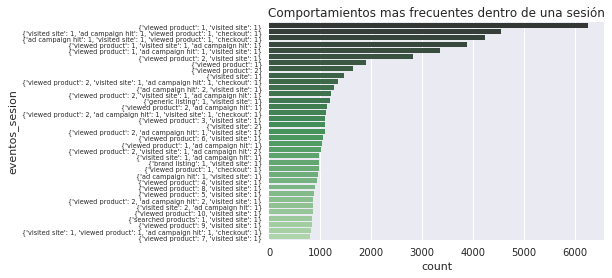

In [188]:
sns_plot = sns.countplot(y='eventos_sesion', data=df, palette="Greens_d",
              order=df.eventos_sesion.value_counts().head(35).index)

sns_plot.set_title("Comportamientos mas frecuentes dentro de una sesión")
sns_plot.set_yticklabels(sns_plot.get_yticklabels(), fontsize=6.5)
fig = sns_plot.get_figure()
fig.savefig("img/comportamientos-frecuentes.png", bbox_inches = 'tight', label='small')
sns_plot

**Evento lead, se anota en lista de espera para cuando haya stock de un producto**

In [15]:
lead_events = events[events["event"] == "lead"].dropna(axis=1, how='all')
lead_events.notnull().any()

timestamp    True
event        True
person       True
model        True
dtype: bool

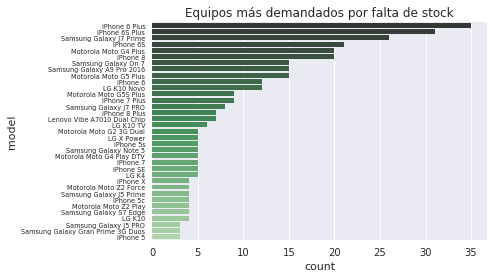

In [22]:
sns_plot = sns.countplot(y="model", data=lead_events, palette="Greens_d",
              order=lead_events.model.value_counts().iloc[:35].index)
sns_plot.set_title("Equipos más demandados por falta de stock")
sns_plot.set_yticklabels(sns_plot.get_yticklabels(), fontsize=6.5)
fig = sns_plot.get_figure()
fig.savefig("img/equipos-falta-stock.png", bbox_inches = 'tight', label='small')
sns_plot

**Evento conversion, es el "trueque"**

In [24]:
conversion_events = events[events["event"] == "conversion"].dropna(axis=1, how='all')
conversion_events.notnull().any()

timestamp    True
event        True
person       True
sku          True
model        True
condition    True
storage      True
color        True
dtype: bool

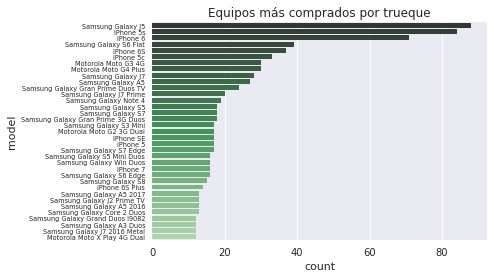

In [26]:
sns_plot = sns.countplot(y="model", data=conversion_events, palette="Greens_d",
              order=conversion_events.model.value_counts().iloc[:35].index)
sns_plot.set_title("Equipos más comprados por trueque")
sns_plot.set_yticklabels(sns_plot.get_yticklabels(), fontsize=6.5)
fig = sns_plot.get_figure()
fig.savefig("img/equipos-comprados-trueque.png", bbox_inches = 'tight', label='small')
sns_plot

**Evento static page, el usuario visita directamente el sitio**

In [28]:
staticpage_events = events[events["event"] == "staticpage"].dropna(axis=1, how='all')
staticpage_events.notnull().any()

timestamp     True
event         True
person        True
staticpage    True
dtype: bool

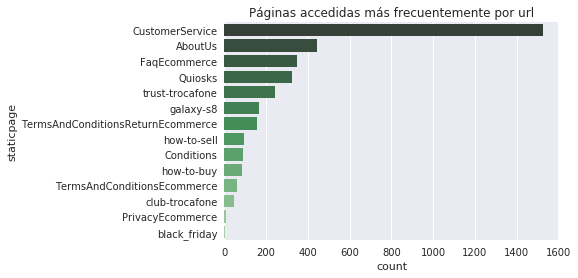

In [30]:
staticpage_events['staticpage'].value_counts()

sns_plot = sns.countplot(y="staticpage", data=staticpage_events, palette="Greens_d",
              order=staticpage_events.staticpage.value_counts().iloc[:15].index)
sns_plot.set_title("Páginas accedidas más frecuentemente por url")
fig = sns_plot.get_figure()
fig.savefig("img/paginas-accedidas-url.png", bbox_inches = 'tight', label='small')
sns_plot

# NOTEBOOK JUAN

In [8]:
%matplotlib qt5

In [9]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [10]:
from juanFunciones import *

In [11]:
import seaborn as sns

sns.set()

In [12]:
types = {
 "event" : "category", 
 "person" : "category", 
 "url" : "category", 
 "sku" : "category", 
 "model" : "category", 
 "condition" : "category", 
 "storage" : "category", 
 "color" : "category", 
 "staticpage" : "category", 
 "campaign_source" : "category", 
 "search_engine" : "category", 
 "channel" : "category", 
 "new_vs_returning" : "category", 
 "city" : "category", 
 "region" : "category", 
 "country" : "category", 
 "device_type" : "category", 
 "screen_resolution" : "category", 
 "operating_system_version" : "category", 
 "browser_version" : "category",
    "os" : "category",
    "model_brand": "category",
}

df = pd.read_csv("fiuba-trocafone-tp1-final-set/events_features.csv", parse_dates=["timestamp"], dtype=types)

In [13]:
from juanFunciones import generateSessions as genSes

In [ ]:
sessions = genSes(df, "20 min")

/home/juan/Documents/Facu/OrganizacionDeDatos/orga2018/juanFunciones.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  nextEvents.loc[nextEvents.index[-1]+1] = ev


In [ ]:
df["session_num"] = sessions

---
## Columnas distintas

In [7]:
df.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'os', 'model_brand'],
      dtype='object')

In [8]:
df.event.cat.categories

Index(['ad campaign hit', 'brand listing', 'checkout', 'conversion',
       'generic listing', 'lead', 'search engine hit', 'searched products',
       'staticpage', 'viewed product', 'visited site'],
      dtype='object')

---
## Columnas que sirven para cada evento

In [56]:
eventosUnicos = df.event.unique()

In [130]:
from juanFunciones import filteredDf

In [57]:
for col in eventosUnicos:
    print(col+": ", filteredDf(df, col).columns.drop(["timestamp", "event", "person"]).values)

ad campaign hit:  ['url' 'campaign_source']
visited site:  ['channel' 'new_vs_returning' 'city' 'region' 'country' 'device_type'
 'screen_resolution' 'operating_system_version' 'browser_version' 'os']
viewed product:  ['sku' 'model' 'condition' 'storage' 'color']
checkout:  ['sku' 'model' 'condition' 'storage' 'color']
generic listing:  ['skus']
search engine hit:  ['search_engine']
brand listing:  ['skus']
searched products:  ['skus' 'search_term']
conversion:  ['sku' 'model' 'condition' 'storage' 'color']
staticpage:  ['staticpage']
lead:  ['model']


In [37]:
df[df["event"] == "visited site"]["screen_resolution"].value_counts()

360x640      30009
1366x768     21379
320x534       3622
1920x1080     3521
320x570       2561
1360x768      2476
1600x900      2435
1024x768      2362
1440x900      2210
1280x1024     1914
320x568       1780
1280x720      1139
1280x800      1102
1536x864      1057
412x732        934
375x667        931
424x753        744
320x480        600
320x569        551
600x1024       432
1680x1050      373
1280x768       343
1024x600       317
768x1024       316
414x736        231
640x360        227
480x800        215
1093x615       208
360x740        203
320x427        163
             ...  
1080x2010        1
240x276          1
2160x1080        1
768x1366         1
976x549          1
1368x768         1
396x704          1
487x866          1
1080x2160        1
1263x789         1
1012x569         1
1958x1101        1
2021x1137        1
1007x569         1
820x480          1
320x240          1
391x695          1
364x647          1
2048x1152        1
1080x2220        1
351x623          1
1920x983    

In [13]:
from juanFunciones import generateSessions as genSes

In [14]:
sessions = genSes(df, "20 min")

/home/juan/Documents/Facu/OrganizacionDeDatos/orga2018/juanFunciones.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  nextEvents.loc[nextEvents.index[-1]+1] = ev


In [15]:
df["session_num"] = sessions

---
### mean events by session

In [17]:
duracion_promedio = df.groupby(["person", "session_num"]).agg({"session_num":"count"}).unstack("session_num").agg("mean").mean()

In [18]:
duracion_promedio

8.011345350646128

---

# ¿Pudieron descubrir features jerarquizando información de alguno de loscampos (por ejemplo “screen_resolution”)?

In [148]:
from juanFunciones import filteredDf, validColumns

In [89]:
validColumns(df)

{'ad campaign hit': array(['url', 'campaign_source'], dtype=object),
 'visited site': array(['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'screen_resolution', 'operating_system_version',
        'browser_version', 'os'], dtype=object),
 'viewed product': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand'],
       dtype=object),
 'checkout': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand'],
       dtype=object),
 'generic listing': array(['skus'], dtype=object),
 'search engine hit': array(['search_engine'], dtype=object),
 'brand listing': array(['skus'], dtype=object),
 'searched products': array(['skus', 'search_term'], dtype=object),
 'conversion': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand'],
       dtype=object),
 'staticpage': array(['staticpage'], dtype=object),
 'lead': array(['model', 'model_brand'], dtype=object)}

In [17]:
dfFeatures = pd.DataFrame(index=df.index)

In [18]:
df1 = filteredDf(df, "visited site")

## Sistemas operativos mas usados segun dispositivo

In [19]:
for os in ["Tizen", "Windows", "iOS", "OS X", "Android", "Other"]:
    dfOS = df1.operating_system_version.str.contains(os)
    if dfOS.any():
        df1.loc[dfOS, "OS"] = os
dfFeatures["os"] = df1["OS"]

In [20]:
df1.head(2)

timestamp         event    person channel new_vs_returning  \
1 2018-05-31 23:38:05  visited site  0004b0a2    Paid              New   
5 2018-05-29 13:29:26  visited site  0006a21a    Paid              New   

             city          region country device_type screen_resolution  \
1      Camaragibe      Pernambuco  Brazil  Smartphone           360x640   
5  Rio de Janeiro  Rio de Janeiro  Brazil  Smartphone           360x640   

  operating_system_version   browser_version       os       OS  
1                Android 6  Chrome Mobile 39  Android  Android  
5            Android 5.1.1       Android 5.1  Android  Android

In [21]:
df1.loc[df1.OS == False, "OS"] = "Other"

In [22]:
df1.OS.value_counts()

Windows    41495
Android    41410
iOS         3539
OS X         406
Other         48
Tizen          7
Name: OS, dtype: int64

## Browsers mas usados segun dispositivo

In [174]:
df1 = filteredDf(df, "visited site")

In [176]:
df1.browser_version.value_counts()

Chrome 66.0                         22611
Chrome Mobile 66.0                  17513
Chrome 65.0                          6635
Chrome Mobile 65.0                   5665
Chrome Mobile 64.0                   3083
Chrome 67.0                          3073
Chrome Mobile 67.0                   2683
Chrome 64.0                          2450
Mobile Safari 11                     2071
Chrome Mobile 39                     1639
Chrome 63.0                          1490
Chrome Mobile 63.0                   1413
Samsung Internet 6.4                 1056
Firefox 60                           1049
Firefox 59                            918
Mobile Safari 10                      703
Edge 16.16299                         658
Chrome 49.0                           602
Chrome Mobile 62.0                    568
Chrome Mobile 55.0                    527
Chrome Mobile 43.0                    422
Chrome Mobile 61.0                    390
IE 11                                 385
Opera 53.0                        

In [197]:
df1["browser"] = False
for browser in ["Chrome","Safari", "Firefox", "Opera", "Samsung Internet", "Edge", "IE", "Facebook", "Android", "UC"]:
    dfBrowser = df1.browser_version.str.contains(browser)
    if dfBrowser.any():
        df1.loc[dfBrowser, "browser"] = browser
dfFeatures["browser"] = df1["browser"]

In [ ]:
dfF

In [200]:
df1.loc[df1.browser == False, "browser"] = "Other"

In [201]:
df1.browser.value_counts()

Chrome              75137
Safari               3402
Firefox              2616
Samsung Internet     1699
Facebook             1415
Edge                 1145
Opera                 689
IE                    643
Android               347
Other                 149
UC                    136
Name: browser, dtype: int64

# ¿Pudieron descubrir features en el campo ‘model’? ¿Cuales fueron?

In [24]:
df.head(2)

timestamp            event    person                        url  \
0 2018-05-31 23:38:05  ad campaign hit  0004b0a2  /comprar/iphone/iphone-5s   
1 2018-05-31 23:38:05     visited site  0004b0a2                        NaN   

   sku model condition storage color skus     ...     new_vs_returning  \
0  NaN   NaN       NaN     NaN   NaN  NaN     ...                  NaN   
1  NaN   NaN       NaN     NaN   NaN  NaN     ...                  New   

         city      region country device_type screen_resolution  \
0         NaN         NaN     NaN         NaN               NaN   
1  Camaragibe  Pernambuco  Brazil  Smartphone           360x640   

  operating_system_version   browser_version       os model_brand  
0                      NaN               NaN      NaN         NaN  
1                Android 6  Chrome Mobile 39  Android         NaN  

[2 rows x 25 columns]

In [25]:
valid = validColumns(df)

In [27]:
#df1 = filteredDf(df, "viewed product")
df1 = df.loc[df.model.notna()].dropna(axis=1, how="all")

In [28]:
df1.loc[:, "model_brand"] = False
for brand in ["Samsung", "iPhone", "Motorola", "Asus", "Lenovo", "Sony", "LG", "Quantum", "iPad", "Blackberry"]:
    dfStr = df1.model.str.contains(brand)
    if dfStr.any():
        df1.loc[dfStr, "model_brand"] = brand
dfFeatures["model_brand"] = df1["model_brand"]

In [29]:
df1.model_brand.value_counts()

iPhone        256585
Samsung       218127
Motorola       63518
LG              9724
Sony            7025
Lenovo          4779
Asus            2091
iPad            1914
Quantum          520
Blackberry         1
Name: model_brand, dtype: int64

## Features de fecha

In [42]:
dfFeatures["day_of_week"] = df.timestamp.dt.dayofweek

In [43]:
dfFeatures["month"] = df.timestamp.dt.month

In [52]:
dfFeatures["week"] = df.timestamp.dt.week

In [62]:
dfT = df.reset_index().set_index("timestamp")

In [63]:
dfT.columns

Index(['index', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'os', 'model_brand'],
      dtype='object')

### Day or night between 8 and 18

In [81]:
dfDay = dfT.between_time("8:00", "18:00")

In [82]:
dfDay.loc[:,"day_vs_night"] = dfDay.event.map(lambda x: "DAY")

/home/juan/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/juan/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [83]:
dfDayIdx = dfDay.set_index("index")

In [84]:
dfFeatures["day_vs_night"] =  dfDayIdx.day_vs_night

In [85]:
dfFeatures["day_vs_night"] = dfFeatures.day_vs_night.fillna(value="NIGHT")

## Features de Color

In [203]:
dfFil = filteredDf(df, "checkout")

In [207]:
dfFil.columns

Index(['timestamp', 'event', 'person', 'sku', 'model', 'condition', 'storage',
       'color', 'model_brand'],
      dtype='object')

In [212]:
from juanFunciones import colorsByName

ImportError: cannot import name 'colorsByName'

In [214]:
colorDic = colorsByName()

In [ ]:
customColors = {}
for elem in dfFil.color.value_counts().index:
    if elem in colorDic:
        print(elem, "IN", colorDic[elem])
        customColors[elem] = colorDic[elem]
    else:
        subElem = elem.split()[0]
        if subElem in colorDic:
            print(subElem, "INOUT", colorDic[subElem])
            customColors[elem] = colorDic[subElem]
        else:
            print(elem, "OUT")
            customColors[elem] = "NOTACOLOR"

In [271]:
customColors["Prateado"] = "#C0C0C0"
customColors["Silver"] = "#C0C0C0"
customColors["Platinum"] = "#D3D3D3"
customColors["Titânio"] = "#D3D3D3"
customColors["Cromo"] = "#D3D3D3"
customColors["Bambu"] = "#008000"
customColors["Black Piano"] = "#000000"
customColors["Indigo"] = "#9400D3"
customColors["Cabernet"] = "#8B0000"
customColors["Rouge"] = "#8B0000"
customColors["Olympic Edition"] = "#8B0000"
customColors["Ônix"] = "#696969"
customColors["Rose"] = "#FFC0CB"
customColors["Framboesa"] = "#FFC0CB"
customColors["Iuna"] = "#FDF5E6"

In [272]:
dfFil["hex_color"] = dfFil.color.map(lambda x: customColors[x])

In [275]:
dfFeatures["hex_color"] = dfFil.hex_color

In [237]:
import matplotlib.pyplot as plt

In [169]:
%matplotlib inline

In [ ]:
matCorr = pd.get_dummies(dfFil.loc[:,["condition", "storage", "model_brand"]]).corr(method="spearman") 
matCorr

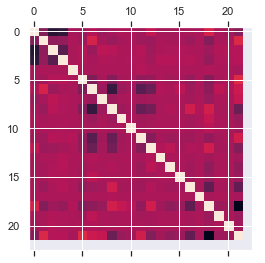

In [206]:
plt.matshow(matCorr)

## Features de 

In [92]:
dfFil = filteredDf(df, "ad campaign hit")

In [ ]:
dfFil[dfFil.url.str.startswith("/comprar/iphone") == True]["url"].value_counts()

# Write to csv

In [277]:
dfFeatures.head()

os model_brand  day_of_week  month  week day_vs_night browser  \
0      NaN         NaN            3      5    22        NIGHT     NaN   
1  Android         NaN            3      5    22        NIGHT  Chrome   
2      NaN      iPhone            3      5    22        NIGHT     NaN   
3      NaN      iPhone            3      5    22        NIGHT     NaN   
4      NaN     Samsung            1      5    22          DAY     NaN   

  hex_color  
0       NaN  
1       NaN  
2       NaN  
3   #808080  
4       NaN

In [278]:
#dfFeatures.to_csv("events_features.csv", index=False)

In [15]:
dfFeat = pd.read_csv("events_features.csv")

---
## Las conversiones de que celular se hicieron?

#### Hacer un fillna forward para valores de device_type etc, por usuario, para relacionar

In [116]:
dfFil = filteredDf(df, "conversion")

In [117]:
dfFil.head()

timestamp       event    person     sku  \
220  2018-03-20 17:46:12  conversion  00204059  3084.0   
2282 2018-04-26 22:28:53  conversion  00c13dee  6650.0   
2547 2018-06-10 14:37:50  conversion  00fdbb4b  3348.0   
4245 2018-03-16 13:50:25  conversion  0146a9df  2694.0   
6985 2018-02-09 22:07:07  conversion  01db2fe6  6357.0   

                                 model  condition storage           color  \
220                   Motorola Moto X2  Muito Bom    32GB   Couro Vintage   
2282  Samsung Galaxy Core Plus Duos TV  Muito Bom     4GB          Branco   
2547            Samsung Galaxy S6 Flat  Muito Bom    32GB          Branco   
4245                         iPhone 5s        Bom    32GB  Cinza espacial   
6985                 Samsung Galaxy J5        Bom    16GB           Preto   

     model_brand  
220     Motorola  
2282     Samsung  
2547     Samsung  
4245      iPhone  
6985     Samsung

In [124]:
df.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'os', 'model_brand'],
      dtype='object')

In [126]:
dfByPer = df.set_index(["person"])

In [6]:
countsByOS = dfByPer.iloc[0:3000].groupby("person").agg({"os":"value_counts"})

NameError: name 'dfByPer' is not defined

---
## Informacion de sesiones para cada persona

#### considero que los campos se mantienen hasta que cambian en el proximo visited_site, y venian igual al primero si no estan especificados

In [17]:
def getSessionByPerson(sessionStats, person, ses):
    person = sessionStats.loc[person]
    if ses not in person.index:
        try:
            ses =  person[(person.index < ses)].index[-1]
        except IndexError:
            ses = person.index[0]
    return person.loc[ses]

In [18]:
getSessionByPerson(sessionStats,"0004b0a2",0)

NameError: name 'sessionStats' is not defined

In [19]:
dfSess = pd.read_csv("session_stats.csv").set_index(["person", "session_number"])

In [10]:
dfIdx = df.set_index(["person", "session_num"])

In [31]:
dfSorted = dfIdx.sort_values(by="timestamp").groupby(["person", "session_num"])

In [114]:
vsChk = dfIdx[(dfIdx["event"]=="visited site") | (dfIdx["event"] == "checkout")]

In [135]:
idx = filteredDf(df, "visited site").set_index(["person", "session_num"])

In [142]:
nwIdx = idx.drop(columns =["timestamp", "event"])

In [149]:
validColumns(df)

{'ad campaign hit': array(['url', 'campaign_source', 'session_num'], dtype=object),
 'visited site': array(['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'screen_resolution', 'operating_system_version',
        'browser_version', 'os', 'session_num'], dtype=object),
 'viewed product': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand',
        'session_num'], dtype=object),
 'checkout': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand',
        'session_num'], dtype=object),
 'generic listing': array(['skus', 'session_num'], dtype=object),
 'search engine hit': array(['search_engine', 'session_num'], dtype=object),
 'brand listing': array(['skus', 'session_num'], dtype=object),
 'searched products': array(['skus', 'search_term', 'session_num'], dtype=object),
 'conversion': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand',
        'session_num'], dtype=object),
 'staticpage': array(['static

In [ ]:
dfIdx[["event","timestamp",'sku', 'model', 'condition', 'storage', 'color', 'model_brand']].join(nwIdx)

In [154]:
dfVisited = df.drop(columns=['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'screen_resolution', 'operating_system_version',
        'browser_version', 'os',]).set_index(["person", "session_num"]).join(nwIdx)

In [175]:
dfIdx = dfIdx.index.drop_duplicates()

In [190]:
dfC = pd.DataFrame(index=dfIdx).join(nwIdx.drop(columns=["channel", "new_vs_returning"]))

In [192]:
idxC = dfC.index.drop_duplicates()

In [25]:
dfIdx[dfSess.columns] = dfSess

In [461]:
dfIdx[dfIdx["event"] == "conversion"].device_type.value_counts()

Computer      641
Smartphone    523
Tablet          6
Unknown         2
Name: device_type, dtype: int64

In [17]:
dfEvCh = dfIdx[(dfIdx["event"]=="visited site") | (dfIdx["event"] == "checkout")]

## Dataframe ordenado por persona y numero de sesion, con visited site arriba si existe, para siempre tener la informacion de visited site para cada sesion.

In [35]:
dfFeat = pd.read_csv("events_features.csv").drop(columns=["os", "model_brand"])

In [36]:
df = df.join(dfFeat)

In [37]:
dfPer = df.set_index("person")

In [38]:
visSitPer = df[df.event == "visited site"].person.drop_duplicates()

In [39]:
convPer = df[df.event == "conversion"].person.drop_duplicates()

In [40]:
idx = visSitPer.append(convPer).drop_duplicates().values

In [41]:
combined = visSitPer.append(convPer)

In [42]:
idx = combined[combined.duplicated()].values

In [43]:
dfEvConv = dfPer.loc[idx]

In [44]:
dfEvConv = dfEvConv[(dfEvConv.event=="visited site") | (dfEvConv.event=="conversion")].reset_index().drop_duplicates(["person", "device_type", "screen_resolution"]).set_index(["person", "session_num"])

In [45]:
validColumns(df)

{'ad campaign hit': array(['url', 'campaign_source', 'session_num', 'day_of_week', 'month',
        'week', 'day_vs_night'], dtype=object),
 'visited site': array(['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'screen_resolution', 'operating_system_version',
        'browser_version', 'os', 'session_num', 'day_of_week', 'month',
        'week', 'day_vs_night', 'browser'], dtype=object),
 'viewed product': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand',
        'session_num', 'day_of_week', 'month', 'week', 'day_vs_night'],
       dtype=object),
 'checkout': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand',
        'session_num', 'day_of_week', 'month', 'week', 'day_vs_night',
        'hex_color'], dtype=object),
 'generic listing': array(['skus', 'session_num', 'day_of_week', 'month', 'week',
        'day_vs_night'], dtype=object),
 'search engine hit': array(['search_engine', 'session_num', 'day_of_week',

In [46]:
dfEvConv = dfEvConv.sort_values(by=["person","timestamp"])

In [47]:
filled = dfEvConv[['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'screen_resolution', 'operating_system_version',
        'browser_version', 'os', 'day_of_week', 'month',
        'week', 'day_vs_night', 'browser']].groupby(["person"]).fillna(method="ffill")

In [48]:
filled = filled.groupby("person").fillna(method="bfill")

In [51]:
dfEvConv[['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'screen_resolution', 'operating_system_version',
        'browser_version', 'os', 'day_of_week', 'month',
        'week', 'day_vs_night', 'browser']] = filled 

In [54]:
conversionStats = filteredDf(dfEvConv, "conversion")

In [55]:
#conversionStats.to_csv("conversion_stats.csv")

In [60]:
conversionStats.device_type.value_counts()

Computer      378
Smartphone    248
Tablet          4
Unknown         1
Name: device_type, dtype: int64

In [72]:
def hasSite(ser):
    return ser.str.contains("visited site")

In [149]:
conversions2 = df.groupby("person").filter(lambda x:("visited site" and "conversion") in x.event.values)

----
## Analisis Conversiones

In [13]:
dfc = pd.read_csv("conversion_stats.csv")

In [14]:
dfc.timestamp = pd.to_datetime(dfc.timestamp)

In [15]:
dfc.columns

Index(['person', 'session_num', 'timestamp', 'event', 'sku', 'model',
       'condition', 'storage', 'color', 'channel', 'new_vs_returning', 'city',
       'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'os', 'model_brand',
       'day_of_week', 'month', 'week', 'day_vs_night', 'browser'],
      dtype='object')

In [16]:
sns.catplot(x="week", y="event", hue="day_vs_night", data=dfc)

AttributeError: module 'seaborn' has no attribute 'catplot'

In [36]:
dfdn = dfc.groupby("month").agg({"day_vs_night":"count"})

In [37]:
dfdn

day_vs_night
month              
1                46
2                45
3               158
4               170
5               176
6                36

In [33]:
dfdn.ungrou

day_vs_night      
day_vs_night          DAY NIGHT
month                          
1                      16    30
2                      19    26
3                      57   101
4                      77    93
5                      72   104
6                      15    21

In [17]:
sns.catplot(x="model_brand", y="os", hue="day_vs_night",
            kind="violin", split=True, data=dfc);


AttributeError: module 'seaborn' has no attribute 'catplot'

In [51]:
dfc.model_brand.value_counts()

Samsung     329
iPhone      184
Motorola     88
LG           14
Lenovo        8
Sony          6
Asus          2
Name: model_brand, dtype: int64

In [56]:
dfc[dfc.model_brand=="iPhone"].os.value_counts()

Windows    103
Android     72
iOS          9
Name: os, dtype: int64

In [69]:
dfc[dfc.model_brand=="Samsung"].os.value_counts()

Windows    198
Android    116
iOS         10
OS X         2
Other        1
Name: os, dtype: int64

In [171]:
dfModelOs = dfc.groupby("country").agg({"os":"value_counts"}).unstack()

In [172]:
dfModelOs.columns = dfModelOs.columns.droplevel()

In [173]:
dfModelOs

os              Android  OS X  Other  Windows   iOS
country                                            
Brazil            222.0   2.0    1.0    361.0  24.0
United Kingdom      NaN   NaN    NaN      1.0   NaN
Unknown             3.0   NaN    NaN     15.0   NaN

In [179]:
dfModelOs = dfc.groupby("model_brand").agg({"day_vs_night":"value_counts"}).unstack()

In [180]:
dfModelOs.columns = dfModelOs.columns.droplevel()

In [181]:
dfModelOs

day_vs_night    DAY  NIGHT
model_brand               
Asus            1.0    1.0
LG              3.0   11.0
Lenovo          NaN    8.0
Motorola       32.0   56.0
Samsung       141.0  188.0
Sony            3.0    3.0
iPhone         76.0  108.0

In [62]:
dfc[dfc.os == "iOS"].model_brand.value_counts()

Samsung     10
iPhone       9
Motorola     5
Name: model_brand, dtype: int64

In [65]:
dfDummies = pd.get_dummies(dfc, columns=["os", "model_brand"])

In [66]:
dfDummies.columns

Index(['person', 'session_num', 'timestamp', 'event', 'sku', 'model',
       'condition', 'storage', 'color', 'channel', 'new_vs_returning', 'city',
       'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'day_of_week', 'month',
       'week', 'day_vs_night', 'browser', 'os_Android', 'os_OS X', 'os_Other',
       'os_Windows', 'os_iOS', 'model_brand_Asus', 'model_brand_LG',
       'model_brand_Lenovo', 'model_brand_Motorola', 'model_brand_Samsung',
       'model_brand_Sony', 'model_brand_iPhone'],
      dtype='object')

In [188]:
sns.pointplot(x="model_brand", y="month", hue="os_Andriod" ,data=dfDummies)

/home/juan/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [20]:
sns.catplot(y="timestamp", x="model_brand", hue="os", kind="swarm", data=dfc)

AttributeError: module 'seaborn' has no attribute 'catplot'

In [192]:
dfc.columns

Index(['person', 'session_num', 'timestamp', 'event', 'sku', 'model',
       'condition', 'storage', 'color', 'channel', 'new_vs_returning', 'city',
       'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'os', 'model_brand',
       'day_of_week', 'month', 'week', 'day_vs_night', 'browser'],
      dtype='object')

In [234]:
sns.catplot(y="timestamp", x="condition", hue="model_brand", kind="strip", data=dfc)

In [229]:
sns.catplot( y="month", x="model_brand" , hue="day_vs_night", kind="violin", split=True, data=dfc)

/home/juan/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [235]:
data = dfc[["model_brand", "os", "day_vs_night"]]

In [242]:
data = data.astype("category")

In [ ]:
sns.pairplot(data, hue="os")

In [262]:
sns.catplot(y="timestamp", x="day_vs_night", hue="os", kind="swarm"
            , data=dfc);

---
# seguimientos Eventos

In [265]:
df.event.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [18]:
ev = pd.read_csv("eventos.csv").set_index("Unnamed: 0")

In [19]:
ev

ad campaign hit  visited site  viewed product  checkout  \
Unnamed: 0                                                                   
ad campaign hit             3390.0       17118.0         28893.0    1120.0   
visited site               19571.0        3516.0         25821.0    1927.0   
viewed product             25811.0       25144.0        367594.0   28415.0   
checkout                     791.0        1185.0          1900.0     754.0   
generic listing             7540.0       10227.0         23176.0     203.0   
search engine hit          13693.0       10058.0          8369.0     312.0   
brand listing               4728.0        4967.0         44313.0     123.0   
searched products           1300.0        2512.0         26093.0      52.0   
conversion                    87.0         323.0            69.0     226.0   
staticpage                   259.0         605.0           810.0      36.0   
lead                          59.0         204.0            27.0       3.0   
NaN                            0.0           0.0             0.0       0.0   

                   generic listing  search engine hit  brand listing  \
Unnamed: 0                                                             
ad campaign hit            12760.0            12048.0         6266.0   
visited site               16346.0            11152.0         5772.0   
viewed product             13770.0            10797.0        35598.0   
checkout                     617.0              262.0           99.0   
generic listing             4635.0             7124.0         7772.0   
search engine hit          12383.0              955.0         3990.0   
brand listing               2497.0             2657.0        37151.0   
searched products           1213.0             1003.0         1251.0   
conversion                   282.0               40.0           20.0   
staticpage                   418.0              230.0          217.0   
lead                          38.0               41.0           14.0   
NaN                            0.0                0.0            0.0   

                   searched products  conversion  staticpage   lead  \
Unnamed: 0                                                            
ad campaign hit               1094.0        14.0        94.0   14.0   
visited site                  2511.0        82.0       496.0   15.0   
viewed product               20593.0        66.0       980.0  145.0   
checkout                        49.0       619.0        33.0   16.0   
generic listing               6101.0        68.0       654.0   33.0   
search engine hit              983.0         4.0       193.0    7.0   
brand listing                 1987.0        15.0       158.0   39.0   
searched products            22550.0         7.0        79.0   13.0   
conversion                      14.0       104.0         6.0    1.0   
staticpage                     137.0         6.0       877.0    3.0   
lead                             7.0         2.0         1.0   52.0   
NaN                              0.0         0.0         0.0    0.0   

                   Unnamed: 12  
Unnamed: 0                      
ad campaign hit           16.0  
visited site             169.0  
viewed product            18.0  
checkout               27410.0  
generic listing            1.0  
search engine hit         10.0  
brand listing              0.0  
searched products          0.0  
conversion                 0.0  
staticpage                 0.0  
lead                       0.0  
NaN                        0.0

In [ ]:
sns.pointplot(data=ev)

---
# Tiempo promedio por sesion

In [14]:
sesgroup = df.groupby(["person", "session_num"])

In [12]:
df[df.person == "000a54b2"]

timestamp              event    person  url      sku  \
8  2018-04-09 20:12:31    generic listing  000a54b2  NaN      NaN   
9  2018-04-09 20:12:31       visited site  000a54b2  NaN      NaN   
10 2018-04-09 20:12:31  search engine hit  000a54b2  NaN      NaN   
11 2018-04-09 20:12:31    ad campaign hit  000a54b2    /      NaN   
12 2018-04-09 20:12:53      brand listing  000a54b2  NaN      NaN   
13 2018-04-09 20:13:14     viewed product  000a54b2  NaN  12661.0   
14 2018-04-09 20:13:20      brand listing  000a54b2  NaN      NaN   
15 2018-05-24 11:21:07    ad campaign hit  000a54b2    /      NaN   
16 2018-05-24 11:21:07       visited site  000a54b2  NaN      NaN   
17 2018-05-24 11:21:07  search engine hit  000a54b2  NaN      NaN   
18 2018-05-24 11:21:08    generic listing  000a54b2  NaN      NaN   
19 2018-05-24 11:26:34    generic listing  000a54b2  NaN      NaN   
20 2018-05-24 11:26:53      brand listing  000a54b2  NaN      NaN   
21 2018-05-24 11:26:56    generic listing  000a54b2  NaN      NaN   
22 2018-05-24 11:27:47     viewed product  000a54b2  NaN  10254.0   
23 2018-05-24 11:27:50    generic listing  000a54b2  NaN      NaN   
24 2018-05-24 11:28:10      brand listing  000a54b2  NaN      NaN   
25 2018-05-24 11:28:36      brand listing  000a54b2  NaN      NaN   
26 2018-05-24 11:28:59     viewed product  000a54b2  NaN   6581.0   
27 2018-05-24 11:29:06     viewed product  000a54b2  NaN   6579.0   
28 2018-05-24 11:29:14     viewed product  000a54b2  NaN   6580.0   
29 2018-05-24 11:29:16     viewed product  000a54b2  NaN   6581.0   
30 2018-05-24 11:29:19     viewed product  000a54b2  NaN   6580.0   
31 2018-05-24 11:29:23     viewed product  000a54b2  NaN   8965.0   
32 2018-05-24 11:30:07     viewed product  000a54b2  NaN   6580.0   
33 2018-05-24 11:30:09     viewed product  000a54b2  NaN   6581.0   
34 2018-05-24 11:30:11     viewed product  000a54b2  NaN   6580.0   
35 2018-05-24 11:30:15     viewed product  000a54b2  NaN   6579.0   
36 2018-05-24 11:30:16     viewed product  000a54b2  NaN   6581.0   
37 2018-05-24 11:30:18     viewed product  000a54b2  NaN   6580.0   
38 2018-05-24 11:30:22     viewed product  000a54b2  NaN   6874.0   
39 2018-05-24 11:30:24     viewed product  000a54b2  NaN   6930.0   
40 2018-05-24 11:30:26     viewed product  000a54b2  NaN   6902.0   
41 2018-05-24 11:30:29     viewed product  000a54b2  NaN   6916.0   
42 2018-05-24 11:32:39      brand listing  000a54b2  NaN      NaN   
43 2018-05-24 11:33:23     viewed product  000a54b2  NaN  12660.0   
44 2018-05-24 11:34:32           checkout  000a54b2  NaN  12660.0   

                   model  condition storage           color  \
8                    NaN        NaN     NaN             NaN   
9                    NaN        NaN     NaN             NaN   
10                   NaN        NaN     NaN             NaN   
11                   NaN        NaN     NaN             NaN   
12                   NaN        NaN     NaN             NaN   
13  Motorola Moto Z Play  Muito Bom    32GB           Preto   
14                   NaN        NaN     NaN             NaN   
15                   NaN        NaN     NaN             NaN   
16                   NaN        NaN     NaN             NaN   
17                   NaN        NaN     NaN             NaN   
18                   NaN        NaN     NaN             NaN   
19                   NaN        NaN     NaN             NaN   
20                   NaN        NaN     NaN             NaN   
21                   NaN        NaN     NaN             NaN   
22         iPhone 7 Plus  Excelente   256GB         Dourado   
23                   NaN        NaN     NaN             NaN   
24                   NaN        NaN     NaN             NaN   
25                   NaN        NaN     NaN             NaN   
26             iPhone 6S        Bom    16GB  Cinza espacial   
27             iPhone 6S  Excelente    16GB  Cinza espacial   
28             iPhone 6S  Muito Bom    16GB  Cinza espacial   
29  

In [16]:
sessions = sesgroup.timestamp.agg(lambda x: x.iloc[x.count()-1] - x.iloc[0])

In [60]:
(sessions != pd.Timedelta(0)).mean()*100

87.86811191682968

In [63]:
sessions = sessions.reset_index()

In [86]:
#sessions.to_csv("time_per_session")

In [16]:
sessions = pd.read_csv("time_per_session").drop(columns="Unnamed: 0")

In [17]:
sessions.timestamp = pd.to_timedelta(sessions.timestamp)

In [18]:
sessions["minutes"] = sessions.timestamp.dt.seconds/60

In [19]:
meanSess = sessions.groupby("person").agg({"session_num":"max", "minutes":"mean"})

In [20]:
sessions = sessions.rename(columns={"timestamp":"time_by_session"})

In [48]:
sessions.head()

session_num time_by_session    minutes           timestamp  \
person                                                                 
0004b0a2          0.0        00:00:35   0.583333 2018-05-31 23:38:05   
0006a21a          0.0        00:00:10   0.166667 2018-05-29 13:29:25   
000a54b2          0.0        00:00:49   0.816667 2018-04-09 20:12:31   
000a54b2          1.0        00:13:25  13.416667 2018-05-24 11:21:07   
00184bf9          0.0        00:06:10   6.166667 2018-04-06 05:12:05   

               day  hour  
person                    
0004b0a2  Thursday    23  
0006a21a   Tuesday    13  
000a54b2    Monday    20  
000a54b2  Thursday    11  
00184bf9    Friday     5

In [22]:
sessions = sessions.set_index(["person", "session_num"])

In [23]:
firstOfEachSess = df.groupby(["person", "session_num"]).timestamp.first()

In [24]:
sessions = sessions.join(firstOfEachSess)

In [25]:
sessions["day"] = sessions.timestamp.dt.day_name()

In [26]:
sessions["hour"] = sessions.timestamp.dt.hour

In [33]:
sessions = sessions.reset_index(level=1)

In [35]:
sesGroup = sessions.groupby("person").agg({"session_num": "max", "minutes": "mean"})

In [96]:
sesGroup.head()

session_num   minutes
person                         
0004b0a2          0.0  0.583333
0006a21a          0.0  0.166667
000a54b2          1.0  7.116667
00184bf9          2.0  3.155556
0019c395          0.0  2.500000

In [104]:
sesGroup = sesGroup.sort_values(by="minutes").reset_index()

In [111]:
s2 = sesGroup.reset_index()

In [113]:
sns.lineplot(x="index", y="minutes", hue="session_num", data=s2)

In [39]:
sessions.head()

session_num time_by_session    minutes           timestamp  \
person                                                                 
0004b0a2          0.0        00:00:35   0.583333 2018-05-31 23:38:05   
0006a21a          0.0        00:00:10   0.166667 2018-05-29 13:29:25   
000a54b2          0.0        00:00:49   0.816667 2018-04-09 20:12:31   
000a54b2          1.0        00:13:25  13.416667 2018-05-24 11:21:07   
00184bf9          0.0        00:06:10   6.166667 2018-04-06 05:12:05   

               day  hour  
person                    
0004b0a2  Thursday    23  
0006a21a   Tuesday    13  
000a54b2    Monday    20  
000a54b2  Thursday    11  
00184bf9    Friday     5

In [54]:
sns.set_palette(sns.color_palette("Blues"))

In [56]:
sns.catplot(x="day", y="minutes", hue="hour", data=sessions)

In [36]:
sesGroup.head()

session_num   minutes
person                         
0004b0a2          0.0  0.583333
0006a21a          0.0  0.166667
000a54b2          1.0  7.116667
00184bf9          2.0  3.155556
0019c395          0.0  2.500000

In [41]:
sns.lineplot(x="session_num", y="minutes", data=sesGroup)

/home/juan/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [42]:
sns.pointplot(x="session_num", y="minutes", data=sesGroup)

/home/juan/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [47]:
sns.pointplot(x="day", y="minutes", hue="session_num", data=sessions)

/home/juan/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


KeyboardInterrupt: 

In [113]:
vals = sessions.minutes.sort_values(ascending=False)

In [95]:
vals.plot(y="timestamp", use_index=False)

NameError: name 'vals' is not defined

In [70]:
s2 = sessions.reset_index()

In [73]:
sns.relplot(y="minutes", x="session_num", kind="line",
            hue="person",data=s2)

KeyboardInterrupt: 

---
de donde provienen los usuarios que salen

In [58]:
ev = pd.read_csv("matriz_eventos_20min.csv")

In [61]:
ev = ev.set_index("Unnamed: 0")

In [80]:
salidas = ev[["salida"]].reset_index()

In [81]:
salidas

Unnamed: 0  salida
0     ad campaign hit    3261
1        visited site    5559
2      viewed product   36088
3            checkout   29203
4     generic listing    5723
5   search engine hit    1242
6       brand listing    6144
7   searched products    3691
8          conversion     438
9          staticpage     778
10               lead     406
11            entrada       0
12             salida       0

In [93]:
salidas = salidas.rename(columns={"Unnamed: 0":"event"})

In [94]:
plt.xticks(rotation=45)
sns.barplot(x="event", y="salida", data=salidas)

---

---


### Eventos
* **“viewed product”**:​ El usuario visita una página de producto.
* **“brand listing”**:​ El usuario visita un listado específico de una marca viendo un conjunto
de productos.
* **“visited site”**:​ El usuario ingresa al sitio a una determinada url.
* **“ad campaign hit”**:​ El usuario ingresa al sitio mediante una campana de marketing
online.
* **“generic listing”**:​ El usuario visita la homepage.
* **“searched products”**: ​ El usuario realiza una búsqueda de productos en la interfaz de
búsqueda del site.
* **“search engine hit”**:​ El usuario ingresa al sitio mediante un motor de búsqueda web.
* **“checkout”**:​ El usuario ingresa al checkout de compra de un producto.
* **“staticpage”**:​ El usuario visita una página
* **“conversion”**:​ El usuario realiza una conversión, comprando un producto.
* **“lead”**: ​ El usuario se registra para recibir una notificación de disponibilidad de stock,
para un producto que no se encontraba disponible en ese momento.

### ¿Se comportan de forma distinta dependiendo del tipo de fuente de tráfico al que pertenecen?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [2]:
types = {
 "event" : "category", 
 "person" : "category", 
 "url" : "category", 
 #"sku" : "float",
 "model" : "category", 
 "condition" : "category", 
 "storage" : "category", 
 "color" : "category", 
 "staticpage" : "category", 
 "campaign_source" : "category", 
 "search_engine" : "category", 
 "channel" : "category", 
 "new_vs_returning" : "category", 
 "city" : "category", 
 "region" : "category", 
 "country" : "category", 
 "device_type" : "category", 
 "screen_resolution" : "category", 
 "operating_system_version" : "category", 
 "browser_version" : "category", 
}

In [3]:
df =  pd.read_csv('fiuba-trocafone-tp1-final-set/events.csv', dtype=types, parse_dates=["timestamp"])

/home/carlos/Documentos/7506-OrgaDatos_2018/development/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

timestamp            event    person                        url  \
0 2018-05-31 23:38:05  ad campaign hit  0004b0a2  /comprar/iphone/iphone-5s   
1 2018-05-31 23:38:05     visited site  0004b0a2                        NaN   
2 2018-05-31 23:38:09   viewed product  0004b0a2                        NaN   
3 2018-05-31 23:38:40         checkout  0004b0a2                        NaN   
4 2018-05-29 13:29:25   viewed product  0006a21a                        NaN   

     sku              model condition storage           color skus  \
0    NaN                NaN       NaN     NaN             NaN  NaN   
1    NaN                NaN       NaN     NaN             NaN  NaN   
2   2694          iPhone 5s       Bom    32GB  Cinza espacial  NaN   
3   2694          iPhone 5s       Bom    32GB  Cinza espacial  NaN   
4  15338  Samsung Galaxy S8       Bom    64GB         Dourado  NaN   

         ...        search_engine channel new_vs_returning        city  \
0        ...                  NaN     NaN              NaN         NaN   
1        ...                  NaN    Paid              New  Camaragibe   
2        ...                  NaN     NaN              NaN         NaN   
3        ...                  NaN     NaN              NaN         NaN   
4        ...                  NaN     NaN              NaN         NaN   

       region country device_type screen_resolution operating_system_version  \
0         NaN     NaN         NaN               NaN                      NaN   
1  Pernambuco  Brazil  Smartphone           360x640                Android 6   
2         NaN     NaN         NaN               NaN                      NaN   
3         NaN     NaN         NaN               NaN                      NaN   
4         NaN     NaN         NaN               NaN                      NaN   

    browser_version  
0               NaN  
1  Chrome Mobile 39  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 23 columns]

In [5]:
ad_camp_df = df.loc[df.event == "ad campaign hit"]\
               .dropna(axis=1, how="all")\
               .drop(columns=['event'])
ad_camp_df.head()

timestamp    person                         url campaign_source
0  2018-05-31 23:38:05  0004b0a2   /comprar/iphone/iphone-5s          criteo
6  2018-05-29 13:29:27  0006a21a  /comprar/samsung/galaxy-s8          criteo
11 2018-04-09 20:12:31  000a54b2                           /          google
15 2018-05-24 11:21:07  000a54b2                           /          google
99 2018-05-17 00:08:56  0019c395  /comprar/samsung/galaxy-j5          google

In [6]:
for col in ad_camp_df.columns[ad_camp_df.isna().any()]:
  print(f'[{col}]')
  print(ad_camp_df[col].isna().value_counts(), '\n')

[url]
False    82756
True        71
Name: url, dtype: int64 

[campaign_source]
False    82796
True        31
Name: campaign_source, dtype: int64 



In [7]:
print('con na:',len(ad_camp_df))
print('sin na:',len(ad_camp_df.dropna()))

con na: 82827
sin na: 82725


In [8]:
# Elimino filas con NA
ad_camp_df.dropna(inplace=True)

In [9]:
ad_camp_df.campaign_source.unique()

[criteo, google, FacebookAds, zanox, rtbhouse, ..., afiliado, MARKETING SOCIAL, socialmedia, Google Social, onsite]
Length: 24
Categories (24, object): [criteo, google, FacebookAds, zanox, ..., MARKETING SOCIAL, socialmedia, Google Social, onsite]

In [10]:
campaigns_count = ad_camp_df.campaign_source.value_counts()
campaigns_count.count()

24

In [11]:
campaigns_count_sum = campaigns_count.sum()
campaigns_count = pd.DataFrame(campaigns_count).rename(columns={'campaign_source':'counts'})
campaigns_count['percentage'] = round(campaigns_count.counts * 100 / campaigns_count_sum, 2)
campaigns_count

counts  percentage
google             58126       70.26
criteo              9694       11.72
rtbhouse            8549       10.33
zanox               1633        1.97
emblue              1350        1.63
FacebookAds          764        0.92
afilio               692        0.84
bing                 484        0.59
voxus                432        0.52
rakuten              310        0.37
indexa               154        0.19
buscape              141        0.17
manifest             126        0.15
Facebook              77        0.09
datacrush             60        0.07
blog                  37        0.04
afiliado              34        0.04
yotpo                 25        0.03
mercadopago           18        0.02
MARKETING SOCIAL       7        0.01
FacebookSocial         7        0.01
onsite                 3        0.00
Google Social          1        0.00
socialmedia            1        0.00

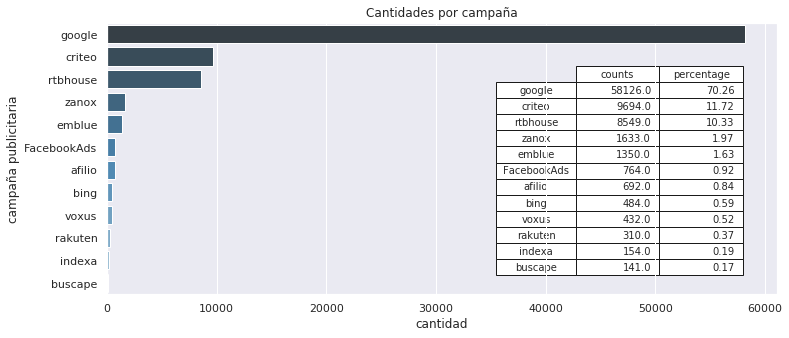

In [12]:
plt.figure(figsize=(12,5))
sns.barplot(y=campaigns_count.head(12).index,
            x=campaigns_count.head(12).counts.values,
            palette='Blues_d',
            orient='h',
            order=campaigns_count.head(12).index)
plt.title('Cantidades por campaña')
plt.xlabel('cantidad')
plt.ylabel('campaña publicitaria')
data = campaigns_count.head(12)
plt.table(cellText=data.values, rowLabels=data.index, colLabels=data.columns, cellLoc='right', rowLoc = 'center', loc='right', bbox=[.7,.07,.25,.77])
plt.show()

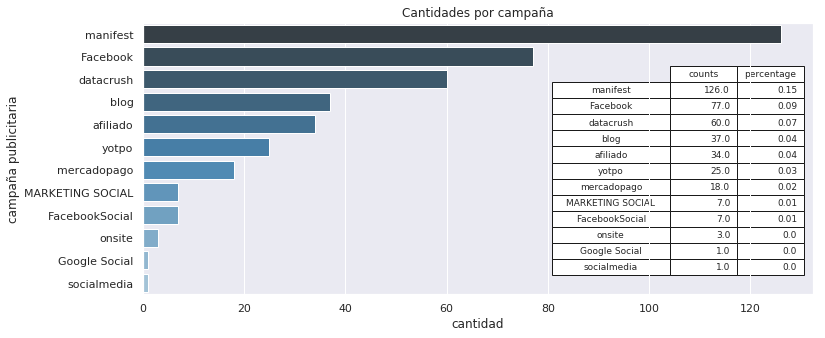

In [13]:
plt.figure(figsize=(12,5))
sns.barplot(y=campaigns_count.tail(12).index,
            x=campaigns_count.tail(12).counts.values,
            palette='Blues_d',
            orient='h',
            order=campaigns_count.tail(12).index)
plt.title('Cantidades por campaña')
plt.xlabel('cantidad')
plt.ylabel('campaña publicitaria')
data = campaigns_count.tail(12)
plt.table(cellText=data.values, rowLabels=data.index, colLabels=data.columns, cellLoc='right', rowLoc = 'center', loc='right', bbox=[.787,.07,.2,.77])
plt.show()

In [14]:
ad_camp_df.url.sample(8)

705675                  /comprar/iphone/6
165234    /comprar/samsung/galaxy-s6-edge
439990                                  /
17068                                   /
591154                                  /
454087         /comprar/samsung/galaxy-s7
657415     /comprar/samsung/galaxy-note-4
160257                                  /
Name: url, dtype: category
Categories (227, object): [/, /comprar/asus/zenfone-3-max-16gb, /comprar/asus/zenfone-5, /comprar/asus/zenfone-6, ..., /comprar/motorola/moto-z2-force, /vender/samsung/galaxy-s8-plus, /comprar/quantum/muv-up, /comprar/lg/lg-g2-mini-d618]

In [15]:
ad_camp_df = ad_camp_df.join(ad_camp_df.url.str.split('/', expand=True)\
                                               .replace({'': None})\
                                               .dropna(axis=1, how='all')\
                                               .rename(columns={1:'url_1',2:'url_2',3:'url_3'}))\
                       .drop(columns=['url'])
ad_camp_df.sample(5)

timestamp    person campaign_source    url_1     url_2  \
822419 2018-05-30 22:25:47  d15cd37c        rtbhouse  comprar  motorola   
654224 2018-05-29 01:08:16  a819f508          google     None      None   
106890 2018-03-22 17:08:14  1c544c75          google     None      None   
157804 2018-05-18 16:30:18  29a01db7        rtbhouse  comprar   samsung   
381106 2018-05-09 00:10:23  6362e76b          google  comprar    iphone   

                             url_3  
822419  motorola-moto-g-3a-geracao  
654224                        None  
106890                        None  
157804               galaxy-note-5  
381106                        None

========google=========
comprar            34363
vender               221
clube-trocafone        2
Name: url_1, dtype: int64 



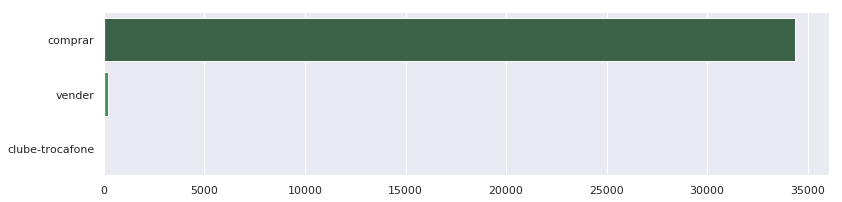

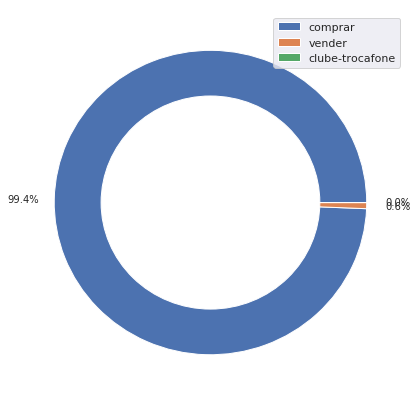

========datacrush=========
comprar               57
termos-e-condicoes     1
Name: url_1, dtype: int64 



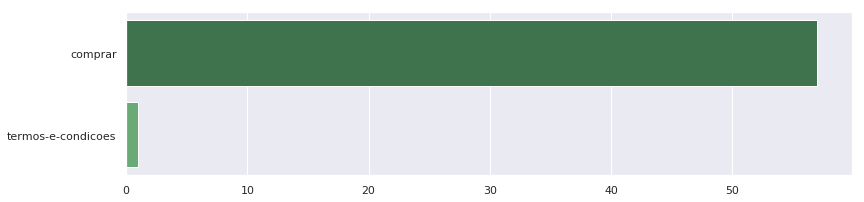

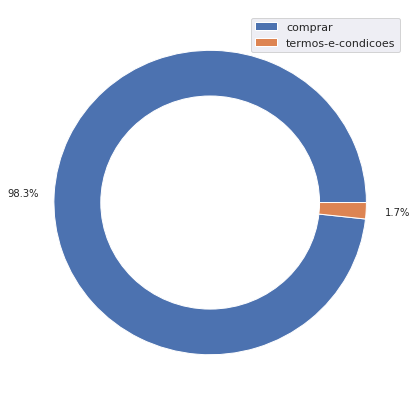

In [16]:
for source in ad_camp_df.campaign_source.unique():
  counts = ad_camp_df.loc[ad_camp_df.campaign_source == source].url_1.value_counts()
  if len(counts) > 1:
    print(f'========{source}=========')
    print(counts, '\n')
    plt.figure(figsize=(13,3))
    sns.barplot(x=counts.values, y=counts.index, palette='Greens_d', orient='h')
    plt.figure(figsize=(7,7))
    plt.pie(counts.values, autopct='%1.1f%%', pctdistance=1.2)
    p=plt.gcf()
    p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
    plt.legend(counts.index)
    plt.show()

In [17]:
top_camps = ad_camp_df.loc[ad_camp_df.url_1 == 'comprar',['campaign_source','url_2']]\
          .groupby('campaign_source').count()\
          .sort_values('url_2', ascending=False)\
          .reset_index().head(3).campaign_source.values

In [18]:
top_camps

[google, criteo, rtbhouse]
Categories (24, object): [Facebook, FacebookAds, FacebookSocial, afilio, ..., MARKETING SOCIAL, socialmedia, Google Social, onsite]

In [19]:
ad_camp_df.loc[(ad_camp_df.campaign_source.apply(lambda x: x in top_camps)) & (ad_camp_df.url_1 == 'comprar'),:].campaign_source.unique()

[criteo, google, rtbhouse]
Categories (3, object): [criteo, google, rtbhouse]

In [20]:
data = pd.DataFrame(ad_camp_df.loc[(ad_camp_df.campaign_source.apply(lambda x: x in top_camps)) & (ad_camp_df.url_1 == 'comprar'),['campaign_source','url_2']].groupby('campaign_source')['url_2'].apply(lambda x: x.value_counts())).reset_index()

In [21]:
data.campaign_source = data.campaign_source.astype(pd.Categorical(data.campaign_source.values.unique()))

In [22]:
data.campaign_source.dtype

CategoricalDtype(categories=['criteo', 'google', 'rtbhouse'], ordered=False)

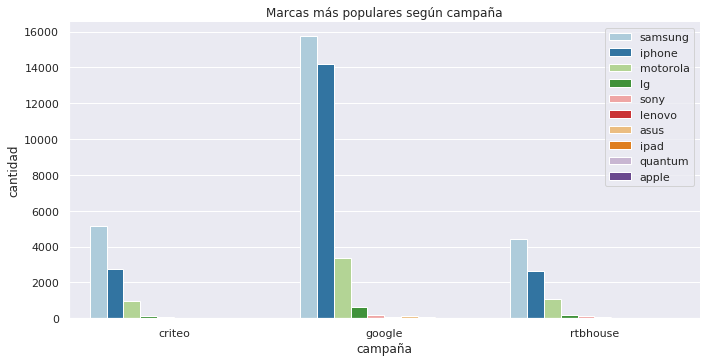

In [23]:
sns.catplot(x='campaign_source',y='url_2', hue='level_1', data=data,
            kind='bar', height=5, aspect=2,sharey='col', palette='Paired', legend=False)
plt.legend(loc='upper right')
plt.title('Marcas más populares según campaña')
plt.ylabel('cantidad')
plt.xlabel('campaña')
plt.show()

---

In [24]:
ad_camp_modelo_df = ad_camp_df.dropna(subset=['url_2','url_3'])

In [25]:
ad_camp_modelo_df['modelo'] = ad_camp_modelo_df.url_2 + '/' + ad_camp_modelo_df.url_3

/home/carlos/Documentos/7506-OrgaDatos_2018/development/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
top_camps = ad_camp_modelo_df.loc[ad_camp_modelo_df.url_1 == 'comprar',['campaign_source','modelo']]\
          .groupby('campaign_source').count()\
          .sort_values('modelo', ascending=False)\
          .reset_index().head(3).campaign_source.values

In [27]:
top_camps

[google, criteo, rtbhouse]
Categories (24, object): [Facebook, FacebookAds, FacebookSocial, afilio, ..., MARKETING SOCIAL, socialmedia, Google Social, onsite]

In [28]:
ad_camp_modelo_df.loc[(ad_camp_modelo_df.campaign_source.apply(lambda x: x in top_camps)) & (ad_camp_modelo_df.url_1 == 'comprar'),:].campaign_source.unique()

[criteo, google, rtbhouse]
Categories (3, object): [criteo, google, rtbhouse]

In [29]:
data = pd.DataFrame(ad_camp_modelo_df.loc[(ad_camp_modelo_df.campaign_source.apply(lambda x: x in top_camps)) & (ad_camp_modelo_df.url_1 == 'comprar'),['campaign_source','modelo']].groupby('campaign_source')['modelo'].apply(lambda x: x.value_counts())).reset_index()

In [30]:
data.campaign_source = data.campaign_source.astype(pd.Categorical(data.campaign_source.values.unique()))

In [31]:
data.campaign_source.dtype

CategoricalDtype(categories=['criteo', 'google', 'rtbhouse'], ordered=False)

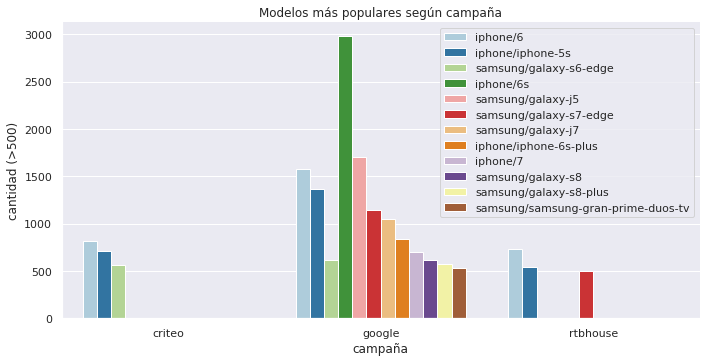

In [32]:
sns.catplot(x='campaign_source',y='modelo', hue='level_1', data=data.loc[data.modelo > 500],
            kind='bar', height=5, aspect=2,sharey='col', palette='Paired',legend=False, )
plt.title('Modelos más populares según campaña')
plt.ylabel('cantidad (>500)')
plt.xlabel('campaña')
plt.legend(loc='upper right')
plt.show()

---

### **Veo que eventos ocurren luego de *ad campaign hit***

In [33]:
# Selecciono los usuarios con eventos de campaña publicitaria
campaign_persons_df = df.loc[df.event == "ad campaign hit"].dropna(axis=1, how="all").drop(columns=['event','url']).dropna()
campaign_persons_df.sample(5)

timestamp    person campaign_source
535741 2018-05-22 16:41:52  8986616c          google
463845 2018-04-06 00:12:41  7725fce4        rtbhouse
161322 2018-04-25 16:17:51  2ab6c725          criteo
564542 2018-02-28 23:27:23  9032a01c          google
456005 2018-05-17 01:21:14  75b287c0          google

In [34]:
print(len(campaign_persons_df))
print(len(campaign_persons_df.person.unique()))

82796
21306


In [35]:
campaign_persons_uniques = campaign_persons_df.person.unique()

In [36]:
ad_campaign_events_df = df[['timestamp','person','event']].loc[df.person.apply(lambda x: x in campaign_persons_uniques),:]

In [37]:
print(len(ad_campaign_events_df))
ad_campaign_events_df.sample(8)

884974


timestamp    person              event
685330 2018-01-25 01:37:26  b04b39a5    generic listing
943356 2018-06-09 19:01:51  ef4766ee       visited site
722658 2018-05-23 00:15:45  ba102035     viewed product
558475 2018-05-16 15:54:05  8eb1e28b      brand listing
136492 2018-04-25 02:07:32  24b54e64  search engine hit
950712 2018-04-29 21:52:44  f0a31891  search engine hit
115303 2018-06-03 20:11:42  1e542102     viewed product
508    2018-05-16 20:14:16  003ff6cd      brand listing

In [38]:
ad_campaign_events_df.sort_values(['person','timestamp'], inplace=True)
ad_campaign_events_df.head(10)

timestamp    person            event
0 2018-05-31 23:38:05  0004b0a2  ad campaign hit
1 2018-05-31 23:38:05  0004b0a2     visited site
2 2018-05-31 23:38:09  0004b0a2   viewed product
3 2018-05-31 23:38:40  0004b0a2         checkout
4 2018-05-29 13:29:25  0006a21a   viewed product
5 2018-05-29 13:29:26  0006a21a     visited site
6 2018-05-29 13:29:27  0006a21a  ad campaign hit
7 2018-05-29 13:29:35  0006a21a         checkout
8 2018-04-09 20:12:31  000a54b2  generic listing
9 2018-04-09 20:12:31  000a54b2     visited site

In [39]:
ad_campaign_events_df['event'] = ad_campaign_events_df.event.str.split(' ').str.join('_')

In [40]:
%%time
after_events = {}
prev_person = ''
prev_time = ''
prev_event = ''
for idx, row in ad_campaign_events_df.iterrows():
  if(row.event == 'ad_campaign_hit'):
    prev_person, prev_event, prev_time = row.person,row.event, row.timestamp
    continue
  else:
    if((not prev_person)&(not prev_event)&(not prev_time)):
      continue
    elif(row.person == prev_person):
      if(prev_event == 'ad_campaign_hit'):
        time_diff = pd.Timedelta(row.timestamp - prev_time).seconds
        #print(f'{prev_time} -', f'{row.timestamp}:', row.timestamp - prev_time, (time_diff > 0) & (time_diff / 60 < 15))
        if((time_diff > 0) & (time_diff / 60 < 10)):
          if(row.event in after_events):
            after_events[row.event][0] += 1
            after_events[row.event][1].append(time_diff)
          else:
            after_events[row.event] = [1,[time_diff]]
          continue
    prev_person, prev_event, prev_time = row.person,row.event, row.timestamp

#print(after_events)

CPU times: user 5min 23s, sys: 424 ms, total: 5min 24s
Wall time: 5min 26s


In [41]:
events_after_campaign_df = pd.DataFrame.from_dict({'event': [x for x in after_events.keys()], 'counts':[x[0] for x in after_events.values()], 'time_diff': [x[1] for x in after_events.values()]})
events_after_campaign_df.sort_values('counts', ascending=False, inplace=True)
events_after_campaign_df

event  counts  \
2     viewed_product  107112   
1      brand_listing   17704   
4    generic_listing   11647   
5  searched_products   11588   
0           checkout    9089   
3  search_engine_hit    3643   
6       visited_site     574   
7         staticpage     528   
8         conversion     111   
9               lead       2   

                                           time_diff  
2  [43, 2, 437, 438, 567, 47, 2, 11, 14, 14, 24, ...  
1  [22, 49, 10, 486, 4, 21, 37, 69, 15, 121, 2, 2...  
4  [2, 1, 1, 18, 7, 2, 4, 2, 1, 2, 9, 1, 1, 6, 9,...  
5  [132, 10, 373, 470, 499, 130, 281, 321, 341, 4...  
0  [8, 16, 88, 36, 114, 56, 23, 220, 203, 24, 37,...  
3  [134, 133, 120, 18, 21, 68, 27, 409, 189, 93, ...  
6  [543, 2, 1, 1, 1, 7, 1, 2, 1, 149, 2, 1, 2, 57...  
7  [569, 392, 63, 205, 161, 384, 94, 118, 119, 12...  
8  [546, 550, 161, 116, 297, 419, 64, 324, 34, 53...  
9                                         [107, 229]

/home/carlos/Documentos/7506-OrgaDatos_2018/development/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/carlos/Documentos/7506-OrgaDatos_2018/development/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


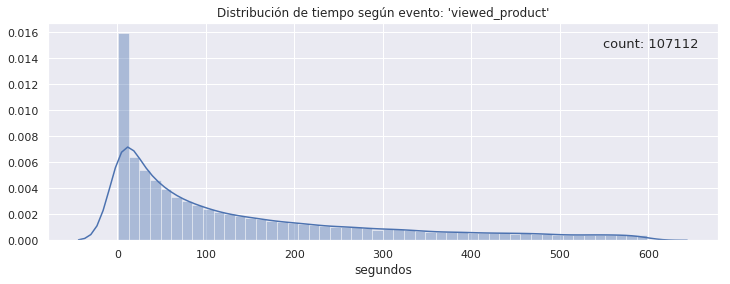

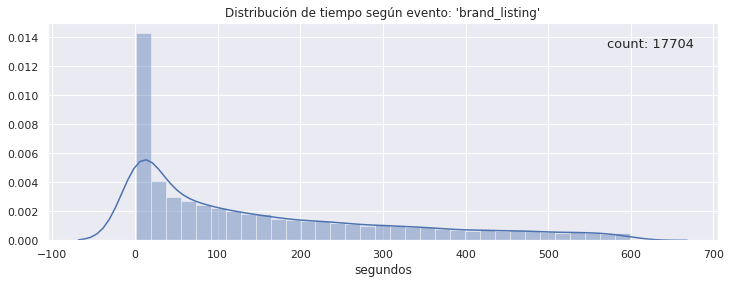

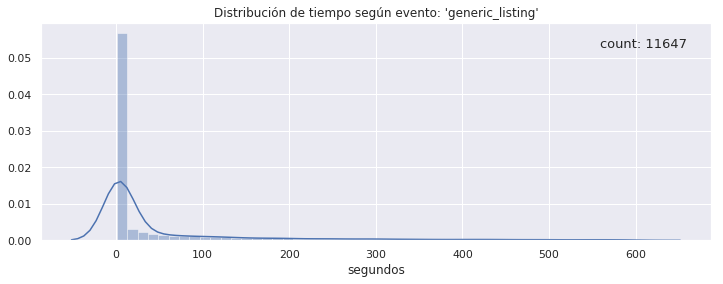

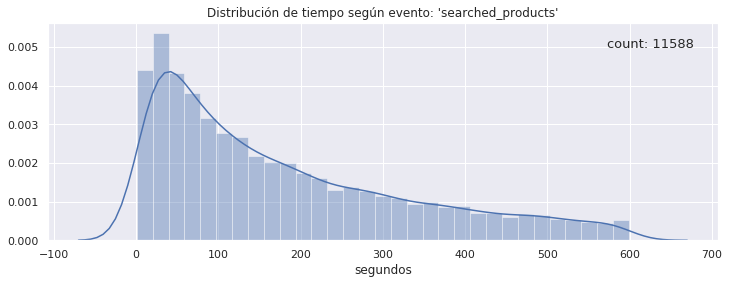

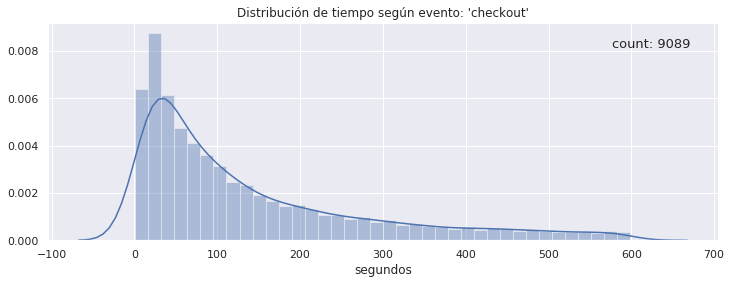

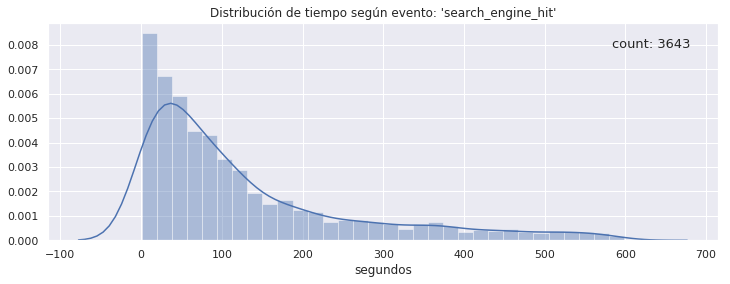

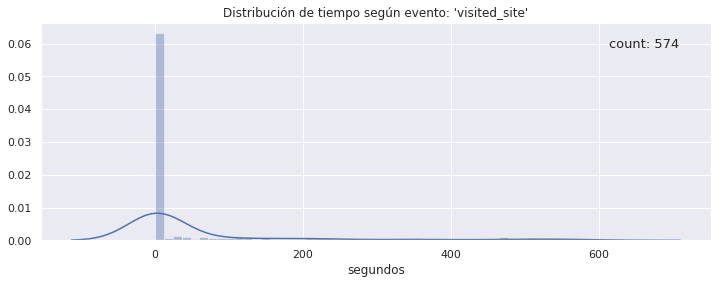

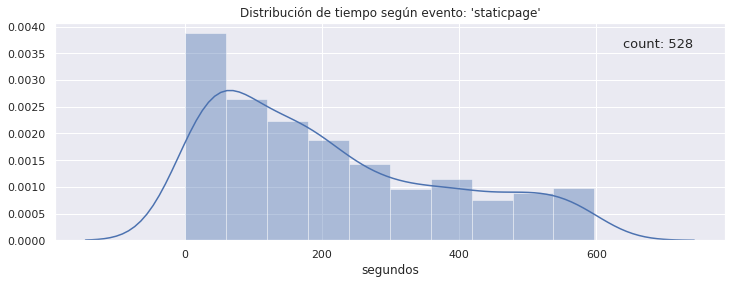

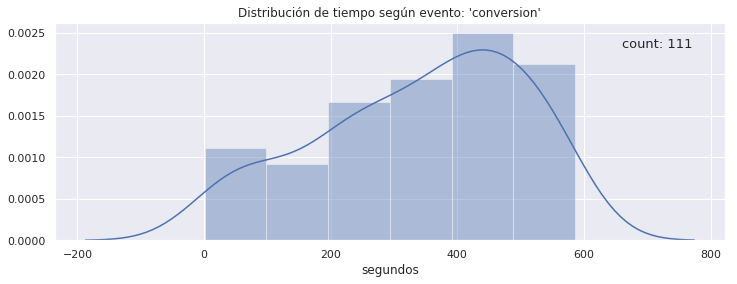

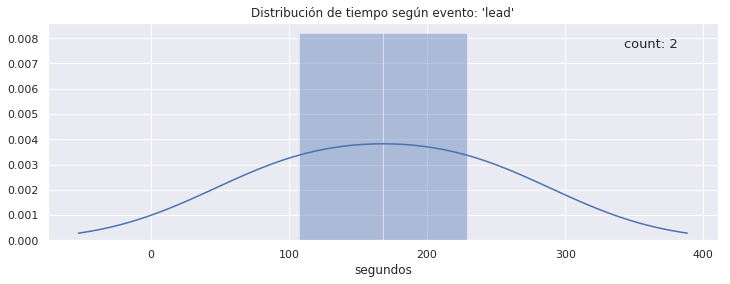

In [44]:
for event in events_after_campaign_df.event:
  data = events_after_campaign_df.loc[events_after_campaign_df.event == event,['counts','time_diff']]
  count_text = f'count: {data.values[0][0]}'
  data = pd.Series(data.values[0][1])
  f = plt.figure(figsize=(12,4))
  sns.distplot(data)
  plt.title(f'Distribución de tiempo según evento: \'{event}\'')
  plt.xlabel('segundos')
  ax = f.add_subplot(111)
  plt.text(0.9, 0.9, count_text, fontsize=13, ha='center', va='center', transform=ax.transAxes)
  plt.show()